# ML Project - Data preprocessing

---

In [ ]:
%load_ext autoreload

In [ ]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell

In [ ]:
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)

In [ ]:
# extra imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox, chi2

from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spotify_data = '/content/drive/MyDrive/Machine Learning Deliverable/data/genres_v2.csv'

## READING THE FILE

In [ ]:
spotify = pd.read_csv(spotify_data, header=0, delimiter=',', dtype={"song_name": str})
spotify.shape

(42305, 22)

### Target variable

In [ ]:
unique_genres = spotify['genre'].unique()
print(unique_genres)
print(len(unique_genres))

['Dark Trap' 'Underground Rap' 'Trap Metal' 'Emo' 'Rap' 'RnB' 'Pop'
 'Hiphop' 'techhouse' 'techno' 'trance' 'psytrance' 'trap' 'dnb'
 'hardstyle']
15


### Other variables

In [ ]:
spotify.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [ ]:
spotify[:4]

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1        0.420         0.060   
1         0.719   0.493    8    -7.230     1        0.079         0.401   
2         0.850   0.893    5    -4.783     1        0.062         0.014   
3         0.476   0.781    0    -4.710     1        0.103         0.024   

   instrumentalness  liveness  valence  ...                      id  \
0         1.340e-02     0.056    0.389  ...  2Vc6NJ9PW9gD9q343XFRKx   
1         0.000e+00     0.118    0.124  ...  7pgJBLVz5VmnL7uGHmRj6p   
2         4.140e-06     0.372    0.039  ...  0vSWgAlfpye0WCGeNmuNhy   
3         0.000e+00     0.114    0.175  ...  0VSXnJqQkwuH2ei1nOQ1nu   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  

[4 rows x 22 columns]

***
## BASIC INSPECTION OF THE DATASET

Numerical columns

In [ ]:
spotify.describe()

danceability     energy        key   loudness       mode  speechiness  \
count     42305.000  4.230e+04  42305.000  42305.000  42305.000    42305.000   
mean          0.639  7.625e-01      5.370     -6.465      0.549        0.137   
std           0.157  1.838e-01      3.666      2.941      0.498        0.126   
min           0.065  2.430e-04      0.000    -33.357      0.000        0.023   
25%           0.524  6.320e-01      1.000     -8.161      0.000        0.049   
50%           0.646  8.030e-01      6.000     -6.234      1.000        0.075   
75%           0.766  9.230e-01      9.000     -4.513      1.000        0.193   
max           0.988  1.000e+00     11.000      3.148      1.000        0.946   

       acousticness  instrumentalness   liveness    valence      tempo  \
count     4.230e+04         42305.000  42305.000  42305.000  42305.000   
mean      9.616e-02             0.283      0.214      0.357    147.474   
std       1.708e-01             0.371      0.176      0.233     23.845   
min       1.070e-06             0.000      0.011      0.019     57.967   
25%       1.730e-03             0.000      0.100      0.161    129.931   
50%       1.640e-02             0.006      0.135      0.322    144.973   
75%       1.070e-01             0.722      0.294      0.522    161.464   
max       9.880e-01             0.989      0.988      0.988    220.290   

       duration_ms  time_signature  Unnamed: 0  
count    42305.000       42305.000   20780.000  
mean    250865.847           3.973   10483.971  
std     102957.714           0.268    6052.360  
min      25600.000           1.000       0.000  
25%     179840.000           4.000    5255.750  
50%     224760.000           4.000   10479.500  
75%     301133.000           4.000   15709.250  
max     913052.000           5.000   20999.000

Categorical columns

In [ ]:
spotify.describe(include='object')

type                      id  \
count            42305                   42305   
unique               1                   35877   
top     audio_features  7D5qMGajdfznFcXFArk5VE   
freq             42305                       9   

                                         uri  \
count                                  42305   
unique                                 35877   
top     spotify:track:7D5qMGajdfznFcXFArk5VE   
freq                                       9   

                                               track_href  \
count                                               42305   
unique                                              35877   
top     https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
freq                                                    9   

                                             analysis_url            genre  \
count                                               42305            42305   
unique                                              35877               15   
top     https://api.spotify.com/v1/audio-analysis/7D5q...  Underground Rap   
freq                                                    9             5875   

       song_name               title  
count      21519               20780  
unique     15439                 132  
top      Forever  Euphoric Hardstyle  
freq          14                1398

These terms were previously unknown to us: <br/>
`Key` is the main tone of the song. There are 12 total (A, A#/Bb, B, C, C#/Db, D, D#/Eb, E, F, F#/Gb, G, and G#/Ab).

`Mode` indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

`Valence`: higher values mean a more positive sound (happy, cheerful)

`Time Signature` is the number of beats in a bar (1/4, 2/4, 4/4, 5/4).

`Type` has the value `audio_features` in every row, so it will be removed.

In [ ]:
spotify.drop(columns=['type'], axis=1, inplace=True)

In [ ]:
print(spotify['mode'].unique())
print(spotify['time_signature'].unique())
print(spotify['title'].unique()[:10])
print(spotify['Unnamed: 0'].unique()[:10], end="\n\n")

missing_cols = [col for col in spotify.columns if spotify[col].isna().sum() > 0]
for col in missing_cols:
  print(col, spotify[col].isna().sum(), sep=" has ", end=" missing values.\n")
print()

print("Sum of number of rows with missing song_name and with missing Unnamed: 0", end=": ")
print(spotify['song_name'].isna().sum() + spotify['Unnamed: 0'].isna().sum())
print("Total number of rows in the dataset", end=": ")
print(spotify.shape[0])
print()

print("Are the rows with missing values for title and Unnamed: 0 the same rows:", spotify[spotify['title'].isna()].equals(spotify[spotify['Unnamed: 0'].isna()]))
print("Tracks with missing title and song_name:", spotify[spotify['title'].isna() & spotify['song_name'].isna()].shape[0])
print("Tracks with NOT missing title and song_name:", spotify[(~spotify['title'].isna()) & (~spotify['song_name'].isna())].shape[0])
print()

[1 0]
[4 3 5 1]
[nan 'Dirtybird Players' 'Tech House Movement' 'tech house'
 'Tech House Bangerz' 'blanc | Tech House' 'Toolroom Tech House'
 'Tech house' 'Dirtybird//Techhouse by Mack\\' 'BOILER ROOM TECHNO HOUSE']
[nan  0.  1.  2.  3.  4.  5.  6.  7.  8.]

song_name has 20786 missing values.
Unnamed: 0 has 21525 missing values.
title has 21525 missing values.

Sum of number of rows with missing song_name and with missing Unnamed: 0: 42311
Total number of rows in the dataset: 42305

Are the rows with missing values for title and Unnamed: 0 the same rows: True
Tracks with missing title and song_name: 6
Tracks with NOT missing title and song_name: 0



Check how the values are distributed in the genre feature, which is our target. Should we delete all rows with Pop genre because they are underepresented a lot compared with the others? We decide not to remove them (yet), but stratify when splitting to train and test sets (and in cv)

In [ ]:
spotify['genre'].value_counts()

genre
Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: count, dtype: int64

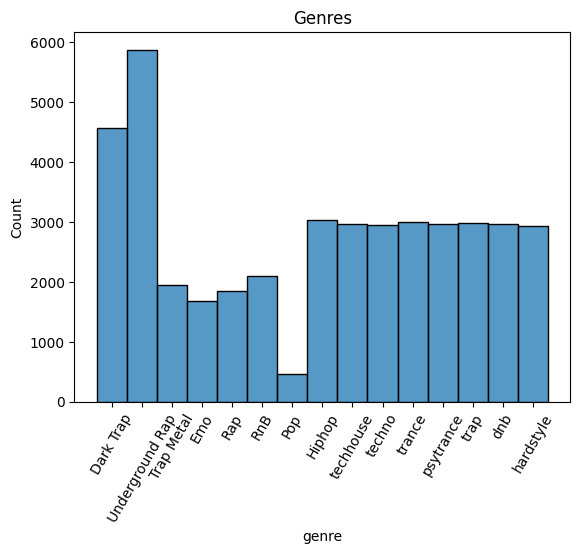

In [ ]:
ax = sns.histplot(spotify["genre"])
ax = plt.xticks(rotation=60)
ax = plt.title("Genres")

In [ ]:
# spotify.drop(spotify.loc[spotify['genre']=="Pop"].index, inplace=True)
# spotify.reset_index(drop = True, inplace=True)

Histograms of the numerical features

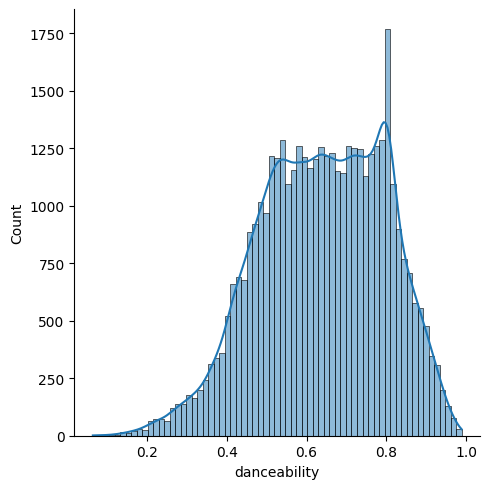

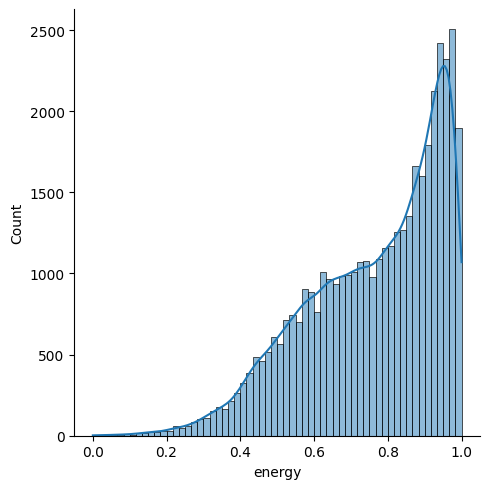

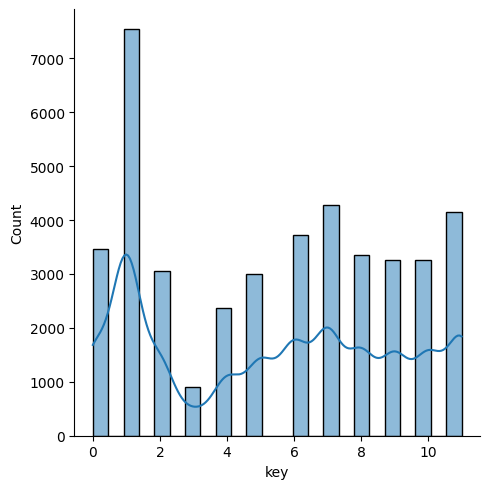

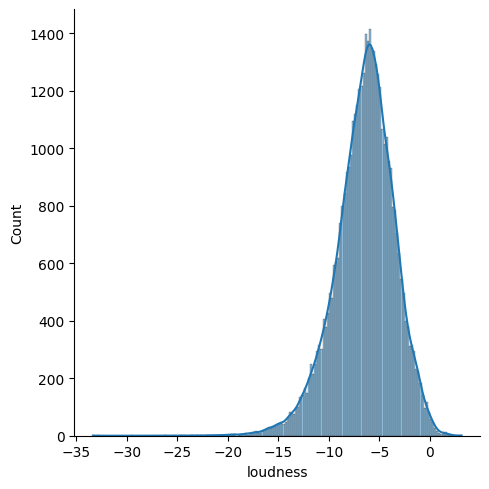

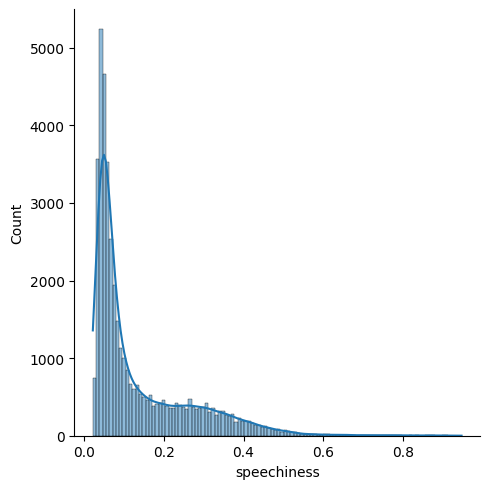

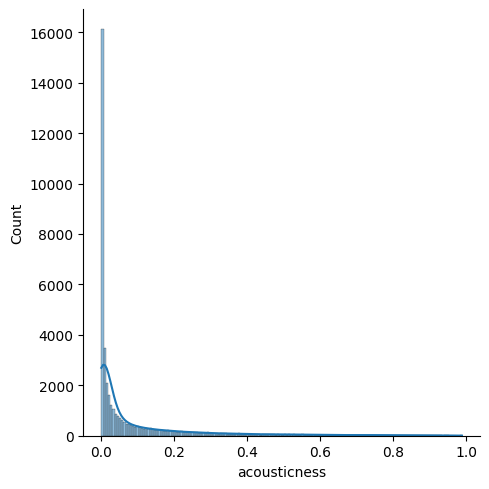

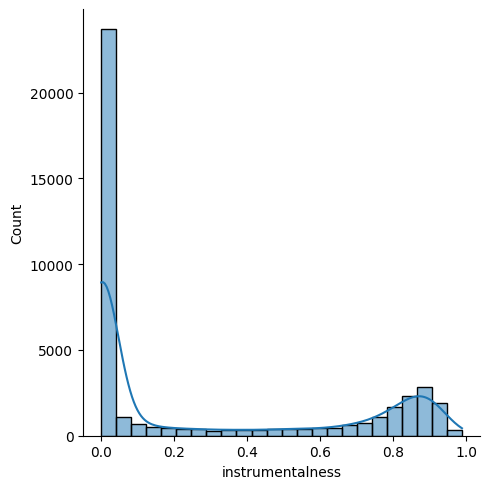

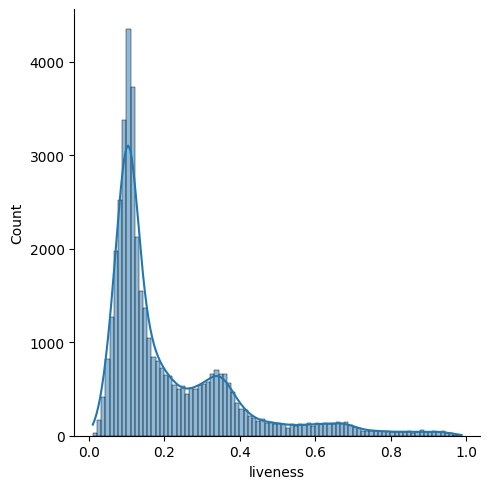

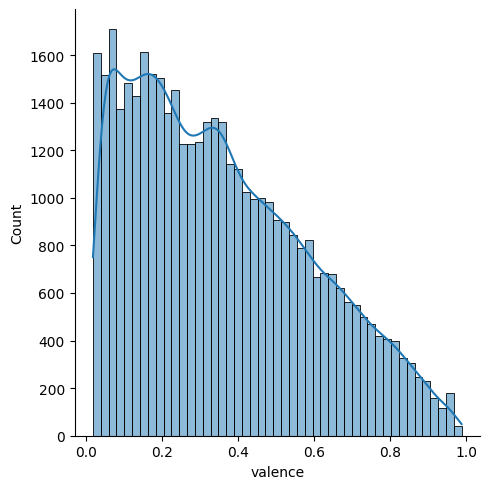

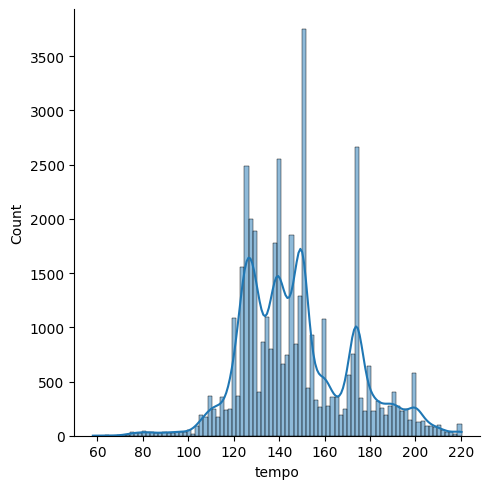

In [ ]:
# fetching a list of song features
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

# plotting histogram for each feature
for col in features:
  sns.displot(spotify, x=col, kde=True)
  plt.show()

Text(0.5, 1.0, 'Duration of songs in different Genres')

<ipython-input-19-6b002d79cae6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='duration_ms', data=spotify, palette='magma')


<Axes: title={'center': 'Duration of songs in different Genres'}, xlabel='duration_ms', ylabel='genre'>

Text(0.5, 0, 'Duration in ms')

Text(0, 0.5, 'Genres')

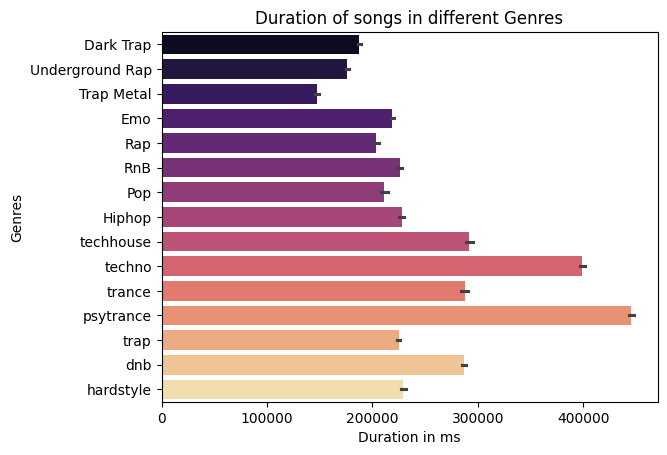

In [ ]:
plt.title('Duration of songs in different Genres')
sns.barplot(y='genre', x='duration_ms', data=spotify, palette='magma')
plt.xlabel('Duration in ms')
plt.ylabel('Genres')

## DEALING WITH MISSING VALUES

Columns `Unnamed: 0` and `title` coincide and exist in rows where `song_name` is missing. However, there are 6 rows where both `song_name` and `title` are missing. These rows will be removed and `title` and `song_name` columns will be combined.

In [ ]:
pd.options.mode.chained_assignment = None

spotify2 = spotify[(~spotify['title'].isna()) | (~spotify['song_name'].isna())]
spotify2['title_new'] = spotify2['title'].fillna(spotify2['song_name'])
print("Number of rows with missing combined title+song_name column", end=": ")
print(spotify2[(spotify2['title_new'].isna())].shape[0])
spotify2 = spotify2.drop(columns=['song_name', 'title', 'Unnamed: 0'], axis=1)
print("Number of rows with any missing values", end=": ")
print(spotify2.isna().sum(axis=1).sum())
spotify2 = spotify2.rename(columns={'title_new': 'title'})
print()

pd.options.mode.chained_assignment = 'warn'
spotify2.head(5)

Number of rows with missing combined title+song_name column: 0
Number of rows with any missing values: 0



danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1        0.420         0.060   
1         0.719   0.493    8    -7.230     1        0.079         0.401   
2         0.850   0.893    5    -4.783     1        0.062         0.014   
3         0.476   0.781    0    -4.710     1        0.103         0.024   
4         0.798   0.624    2    -7.668     1        0.293         0.217   

   instrumentalness  liveness  valence    tempo                      id  \
0         1.340e-02     0.056    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
1         0.000e+00     0.118    0.124  115.080  7pgJBLVz5VmnL7uGHmRj6p   
2         4.140e-06     0.372    0.039  218.050  0vSWgAlfpye0WCGeNmuNhy   
3         0.000e+00     0.114    0.175  186.948  0VSXnJqQkwuH2ei1nOQ1nu   
4         0.000e+00     0.166    0.591  147.988  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...       224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...        98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...       123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...       123298   

   time_signature      genre                                          title  
0               4  Dark Trap                            Mercury: Retrograde  
1               4  Dark Trap                                      Pathology  
2               4  Dark Trap                                       Symbiote  
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)  
4               4  Dark Trap                                          Venom

In [ ]:
spotify2.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
title               0
dtype: int64

In [ ]:
spotify2['liveness'].max()

0.988

In [ ]:
spotify2['liveness'].min()

0.0107

## Duplicated Observations

We observed by seing the distribution values of the 'id' column that there are some observations with all their **values duplicated**. More specifically there are thousands of rows having the same values in all their features *except the feature 'title'*.

In [ ]:
spotify2['id'].value_counts()

id
7D5qMGajdfznFcXFArk5VE    9
5lXY6PTuWXOludKy4zDQwM    8
5cRDn5aGMLvWsldoRmOOz0    8
3BSuC9Y6MhalaLlhyNbTYZ    8
71NOmiKvk7s5R7dUurNjuy    7
                         ..
0PIhZHuUMkxYIueyOJ9rSh    1
2V28RKTOabMKk2xvIDyCEz    1
24b20V609aI0WJ8LyxR8qx    1
0n9DFrzYy1E7iQMjsqomiU    1
6MAAMZImxcvYhRnxDLTufD    1
Name: count, Length: 35871, dtype: int64

In the example below it is seen that the '**title**' column has almsot the same value with some alternations in the string value. Thus, we consider these duplicated lines not needed and we keep only the first observation of the duplicates that have same values in all columns except 'title'. More than 3200 observatons are dropped.

In [ ]:
spotify2[spotify2['id']=='7D5qMGajdfznFcXFArk5VE']

danceability  energy  key  loudness  mode  speechiness  acousticness  \
37044         0.447   0.931    5    -3.879     0        0.051         0.048   
37486         0.447   0.931    5    -3.879     0        0.051         0.048   
37623         0.447   0.931    5    -3.879     0        0.051         0.048   
37723         0.447   0.931    5    -3.879     0        0.051         0.048   
38037         0.447   0.931    5    -3.879     0        0.051         0.048   
38051         0.447   0.931    5    -3.879     0        0.051         0.048   
38351         0.447   0.931    5    -3.879     0        0.051         0.048   
38499         0.447   0.931    5    -3.879     0        0.051         0.048   
39282         0.447   0.931    5    -3.879     0        0.051         0.048   

       instrumentalness  liveness  valence    tempo                      id  \
37044             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
37486             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
37623             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
37723             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
38037             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
38051             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
38351             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
38499             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   
39282             0.225     0.283    0.141  173.992  7D5qMGajdfznFcXFArk5VE   

                                        uri  \
37044  spotify:track:7D5qMGajdfznFcXFArk5VE   
37486  spotify:track:7D5qMGajdfznFcXFArk5VE   
37623  spotify:track:7D5qMGajdfznFcXFArk5VE   
37723  spotify:track:7D5qMGajdfznFcXFArk5VE   
38037  spotify:track:7D5qMGajdfznFcXFArk5VE   
38051  spotify:track:7D5qMGajdfznFcXFArk5VE   
38351  spotify:track:7D5qMGajdfznFcXFArk5VE   
38499  spotify:track:7D5qMGajdfznFcXFArk5VE   
39282  spotify:track:7D5qMGajdfznFcXFArk5VE   

                                              track_href  \
37044  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
37486  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
37623  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
37723  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
38037  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
38051  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
38351  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
38499  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   
39282  https://api.spotify.com/v1/tracks/7D5qMGajdfzn...   

                                            analysis_url  duration_ms  \
37044  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
37486  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
37623  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
37723  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
38037  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
38051  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
38351  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
38499  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   
39282  https://api.spotify.com/v1/audio-analysis/7D5q...       179561   

       time_signature genre                                              title  
37044               4   dnb                      UKF Drum & Bass - All Uploads  
37486               4   dnb                                    UKF Drum & Bass  
37623               4   dnb                       Drum and Bass - 2015 to 2020  
37723               4   dnb  Drum and Bass 2020 (Drum & Bass Music - DNB Hits)  
38037               4   dnb                                   DRUM & BASS 2020  
38051               4   dnb                               Drum and Bass Top 50  
38351               4   dnb                            

In [ ]:
temp = spotify2.drop_duplicates(subset=spotify2.columns.difference(['title']), keep='first')
print('Shape before dropping of duplicates: ', spotify2.shape, 'Shape after dropping duplicates: ',temp.shape, 'Dropped rows:', spotify2.shape[0]-temp.shape[0])
spotify2 = temp
spotify2['id'].value_counts()

Shape before dropping of duplicates:  (42299, 19) Shape after dropping duplicates:  (39081, 19) Dropped rows: 3218


id
2Vc6NJ9PW9gD9q343XFRKx    5
7GX5flRQZVHRAGd6B4TmDO    5
3PcrNUFsSYnkJJNE6roBKl    5
3IwYinsKsM5EUJhEJWwZ0a    5
7floNISpH8VF4z4459Qo18    5
                         ..
5KVciTEfXvpcFHR3RFbtJy    1
3W4JFzOQdo5J2Wgt9DFg24    1
7u90MSvVyEjL0c8icaE7jl    1
0JZWT15H3PSXcVIHYxGX35    1
6MAAMZImxcvYhRnxDLTufD    1
Name: count, Length: 35871, dtype: int64

However there are more rows that have duplicated ids. We checked them and an example exists below, in which we can see that the different column is the genre, which could mean that the same song belongs to more than one genre. There are almost 3 thousand rows with duplicated values in all features except genre. Though, we want to keep those rows, because a song could belong in various genre. If we were to delete them there would be other duplicated rows with a difference only in one but different column. Yet, we decide to keep all of them since we consider the other features valuable in case they have duplicated values.

In [ ]:
spotify2[spotify2['id']=='2Vc6NJ9PW9gD9q343XFRKx']

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1         0.42          0.06   
4624          0.831   0.814    2    -7.364     1         0.42          0.06   
10698         0.831   0.814    2    -7.364     1         0.42          0.06   
15615         0.831   0.814    2    -7.364     1         0.42          0.06   
20043         0.831   0.814    2    -7.364     1         0.42          0.06   

       instrumentalness  liveness  valence    tempo                      id  \
0                 0.013     0.056    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
4624              0.013     0.056    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
10698             0.013     0.056    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
15615             0.013     0.056    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
20043             0.013     0.056    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   

                                        uri  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
4624   spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
10698  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
15615  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
20043  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
4624   https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
10698  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
15615  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
20043  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   

                                            analysis_url  duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
4624   https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
10698  https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
15615  https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
20043  https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   

       time_signature            genre                title  
0                   4        Dark Trap  Mercury: Retrograde  
4624                4  Underground Rap  Mercury: Retrograde  
10698               4       Trap Metal  Mercury: Retrograde  
15615               4              Rap  Mercury: Retrograde  
20043               4           Hiphop  Mercury: Retrograde

In [ ]:
temp = spotify2.drop_duplicates(subset=spotify2.columns.difference(['genre']), keep='first')
temp.shape

(36231, 19)

## FINDING OUTLIERS

In real data you are usually going to find outliers. It can be because the data is just like that or because there are wrong values stored.

It is important to identify them so you can remove them, impute them, or just acknowledge their existence and take into account in your analysis.

Some machine learning models are very sensitive to outliers.

There are a lot of ways to define an outlier. Here we are going to talk about a basic and a complex one.

<Axes: >

array([<Axes: title={'center': 'danceability'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'energy'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'key'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'loudness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'mode'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'speechiness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'acousticness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'instrumentalness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'liveness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'valence'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'tempo'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'duration_ms'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'time_signature'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'instrumentalness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'instrumentalness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'speechiness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'acousticness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'liveness'}>], dtype=object)

<Axes: >

array([<Axes: title={'center': 'danceability'}>], dtype=object)

Number of danceability outliers below the value of 0.2: 111


<Axes: >

array([<Axes: title={'center': 'loudness'}>], dtype=object)

Number of loudness outliers below the value of -27: 3


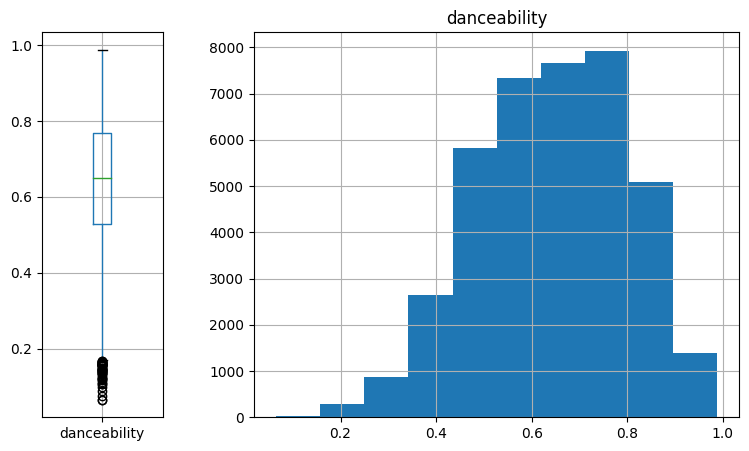

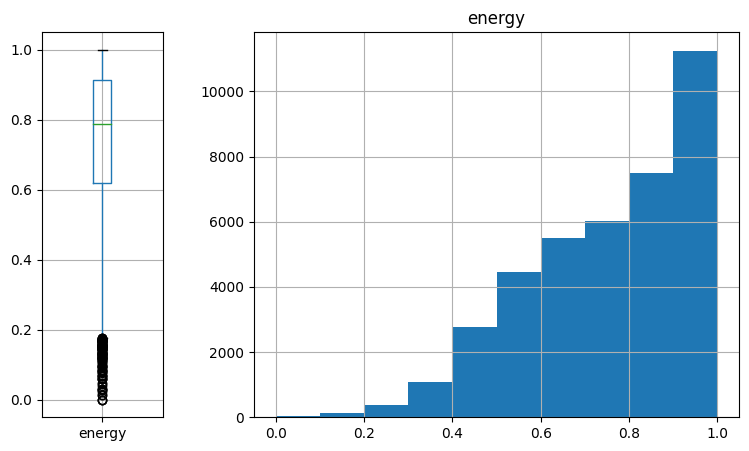

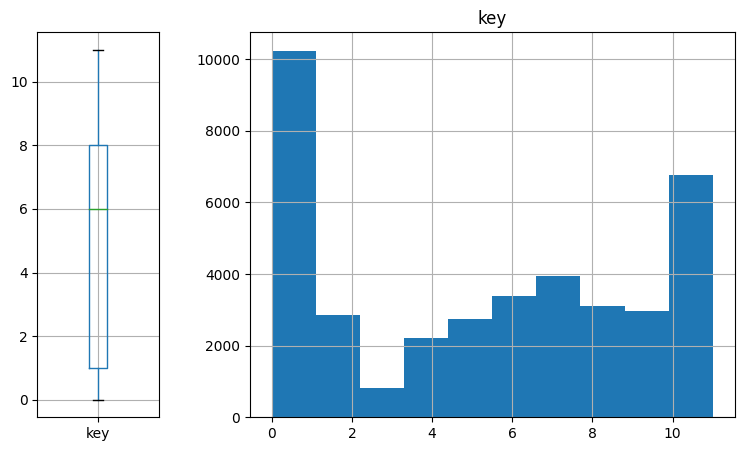

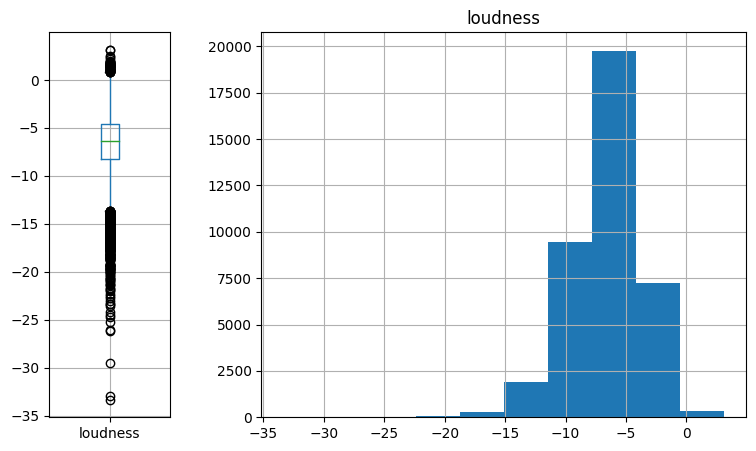

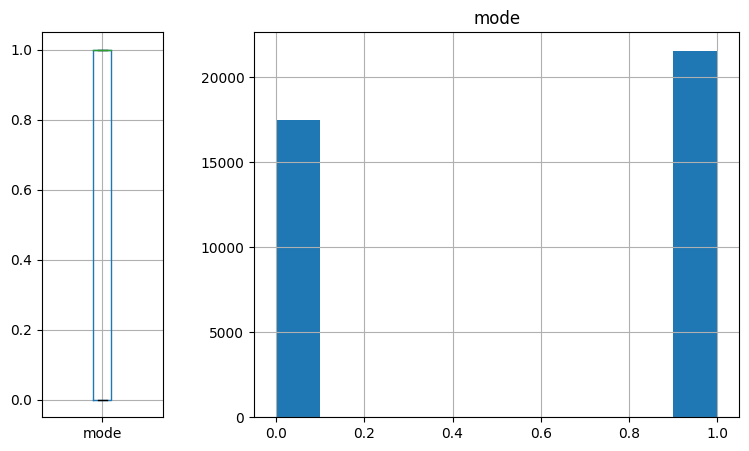

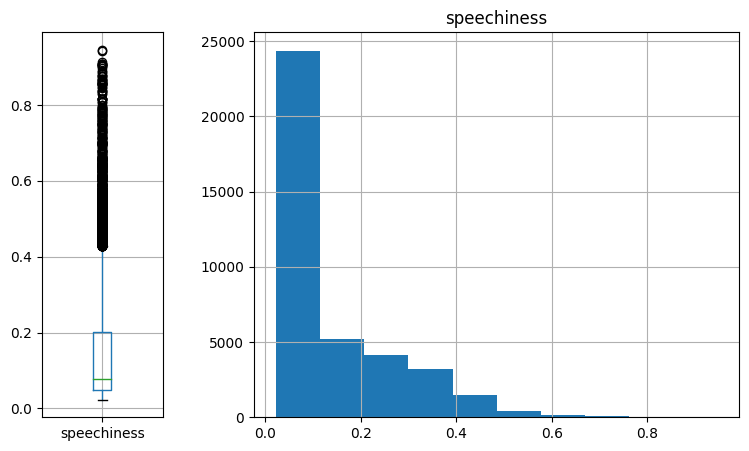

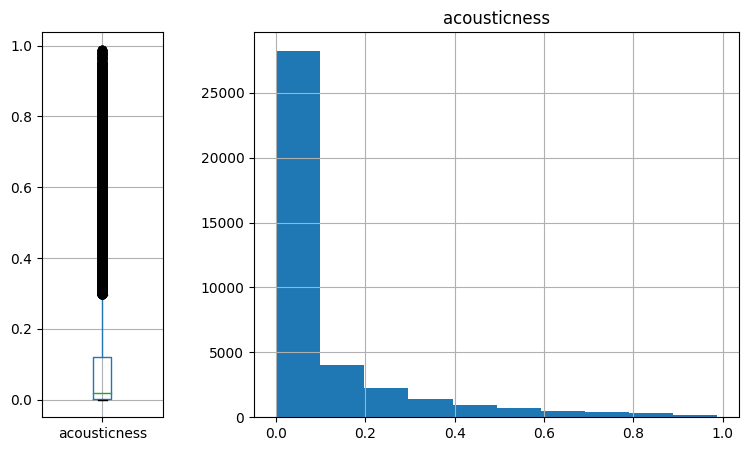

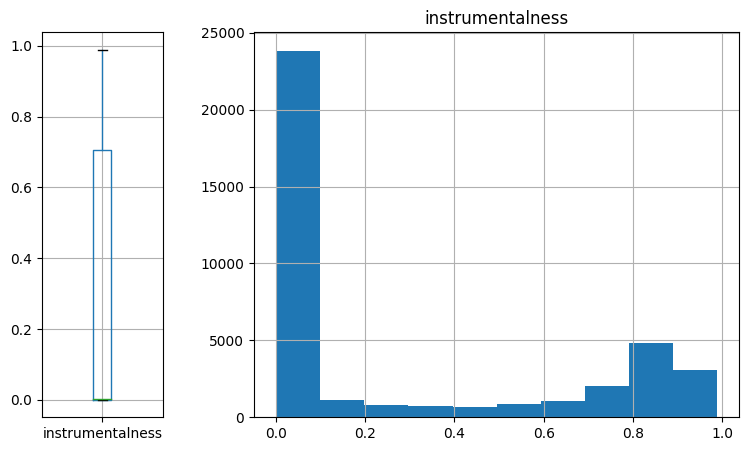

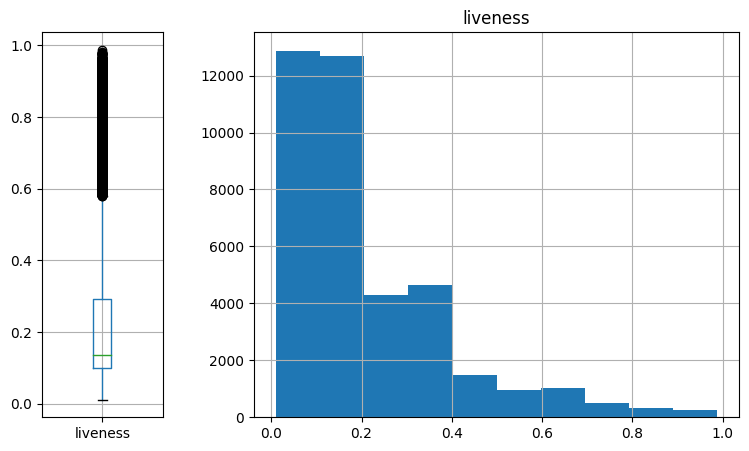

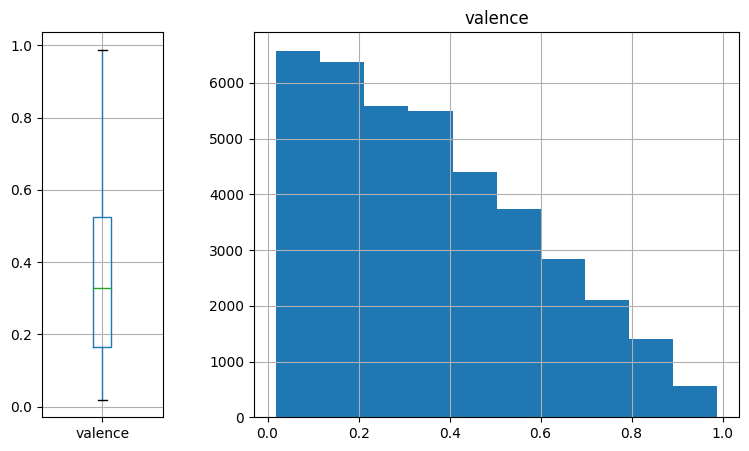

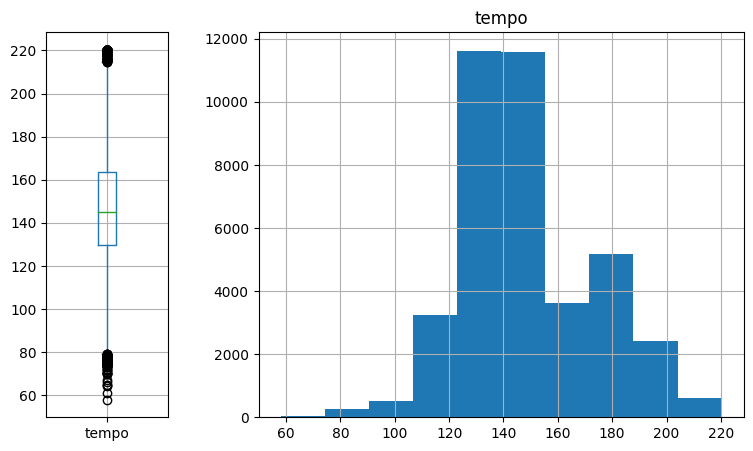

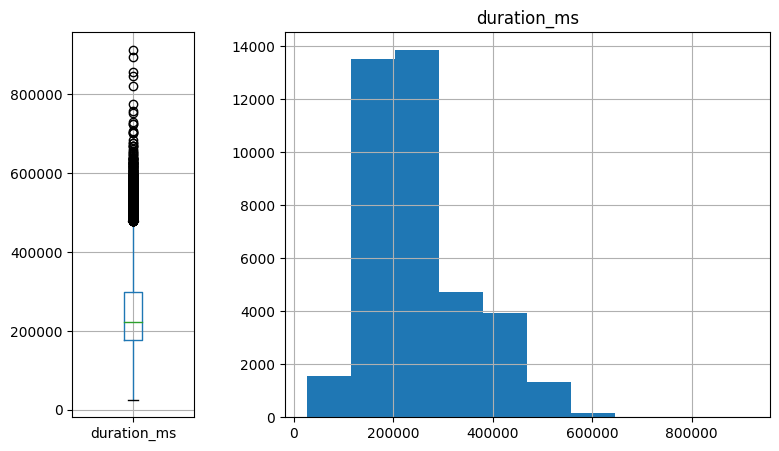

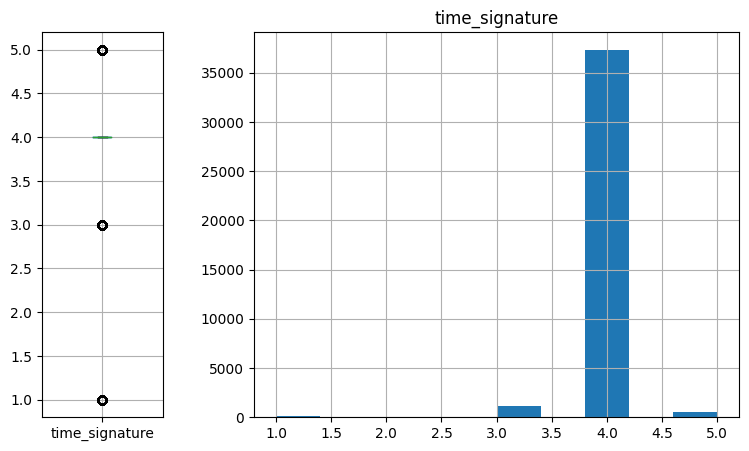

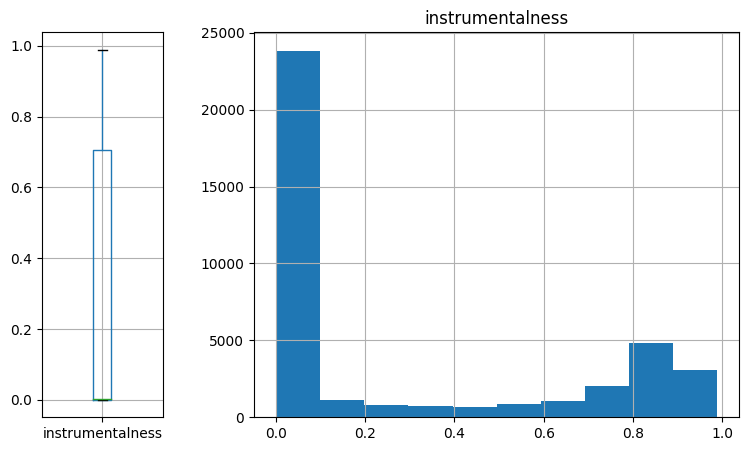

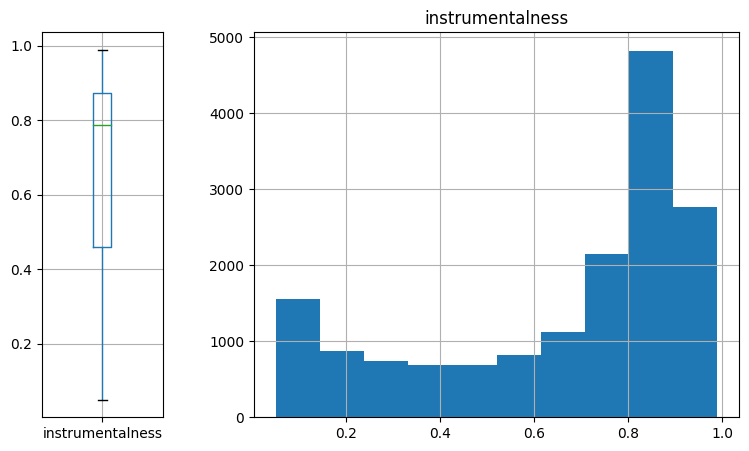

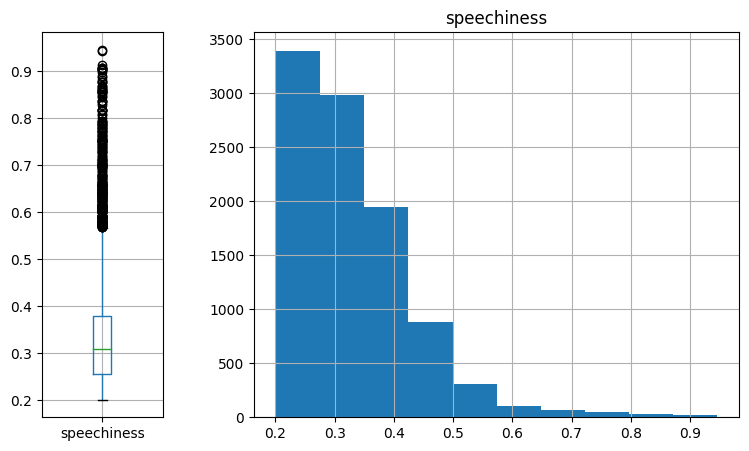

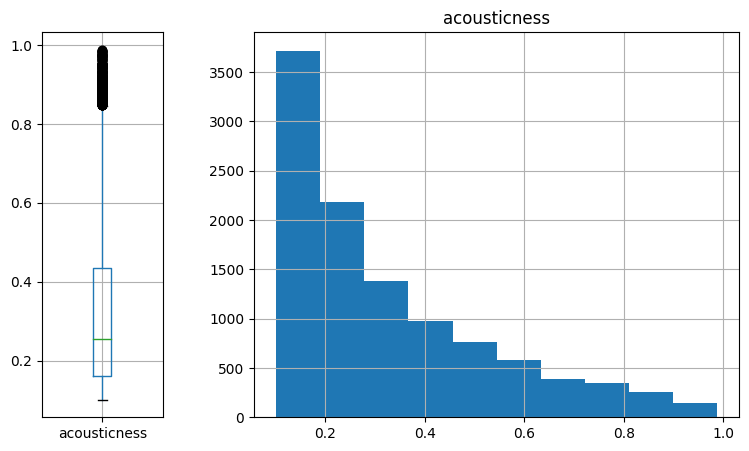

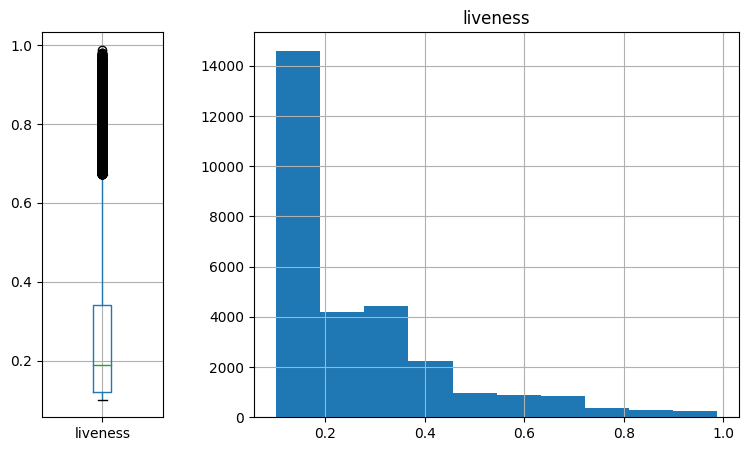

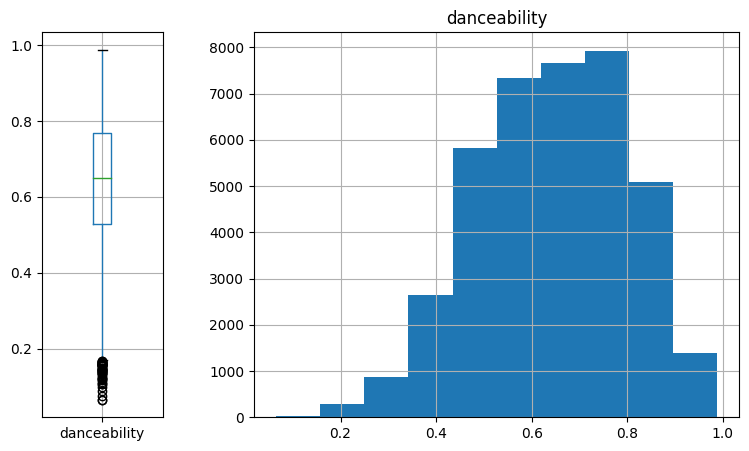

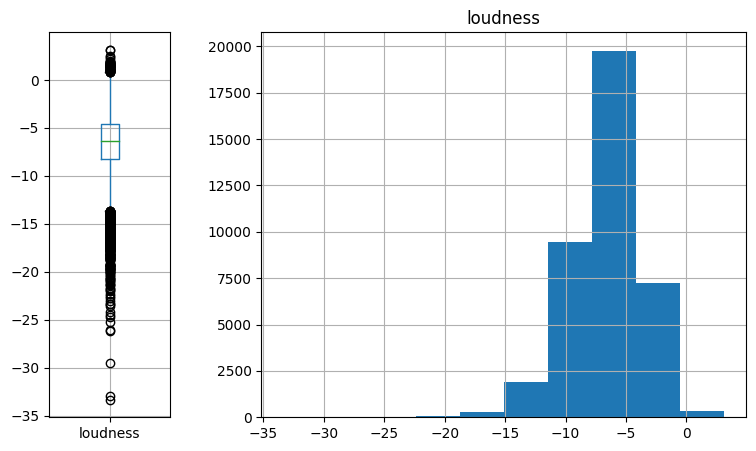

In [ ]:
# All numerical features
for col in (spotify2.select_dtypes(include=np.number).columns):
  fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
  spotify2.boxplot(column=col,ax=axes[0]);
  spotify2.hist(column=col, ax=axes[1]);

# Instrumentalness
# predicts whether a track contains no vocals.
# The closer the instrumentalness value is to 1.0, the greater likelihood the
# track contains no vocal content. Values above 0.5 are intended to represent
# instrumental tracks, but confidence is higher as the value approaches 1.0.
# Since most of the tracks are vocal, the data points are heavily concentrated
# around 0-0,05. If we look at the data above 0.05, we get a clearer image of
# the predictions above this threshold.
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2.boxplot(column='instrumentalness',ax=axes[0]);
spotify2.hist(column='instrumentalness', ax=axes[1]);
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2[spotify2['instrumentalness'] > 0.05].boxplot(column='instrumentalness',ax=axes[0]);
spotify2[spotify2['instrumentalness'] > 0.05].hist(column='instrumentalness', ax=axes[1]);


# Speechiness, acousticness and liveness
# had a similar plot like instrumentalness, but they are heavy skewed to
# the left?? even when the minimum threshold is raised.

fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2[spotify2['speechiness'] > 0.2].boxplot(column='speechiness',ax=axes[0]);
spotify2[spotify2['speechiness'] > 0.2].hist(column='speechiness', ax=axes[1]);
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2[spotify2['acousticness'] > 0.1].boxplot(column='acousticness',ax=axes[0]);
spotify2[spotify2['acousticness'] > 0.1].hist(column='acousticness', ax=axes[1]);
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2[spotify2['liveness'] > 0.1].boxplot(column='liveness',ax=axes[0]);
spotify2[spotify2['liveness'] > 0.1].hist(column='liveness', ax=axes[1]);


# Danceability
# has a small ~100 group of outliers around 0.1
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2.boxplot(column='danceability',ax=axes[0]);
spotify2.hist(column='danceability', ax=axes[1]);
print("Number of danceability outliers below the value of 0.2", end=": ")
print(spotify2[spotify2['danceability'] <= 0.2].shape[0])


# Loudness
# has a few ~3 outliers below -27
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2.boxplot(column='loudness',ax=axes[0]);
spotify2.hist(column='loudness', ax=axes[1]);
print("Number of loudness outliers below the value of -27", end=": ")
print(spotify2[spotify2['loudness'] < -27.0].shape[0])

The columns: `instrumentalness`, `speechiness`, `acousticness`, `danceability` and `loudness` had somewhat peculiar plots (details in the comments in the code above). The other columns do not have any notable outlier patterns.

### IQR

When removing small and big outliers for `liveness`, we remove the range (0.6-1.0), but
we can more clearly see the distribution around 0.
Similar thing happens with speechines, however we remove the range around (0.4-1.0).
These were not visible with manual cutoff in the previous cell.

0.1 0.292 0.19199999999999998
0 2317


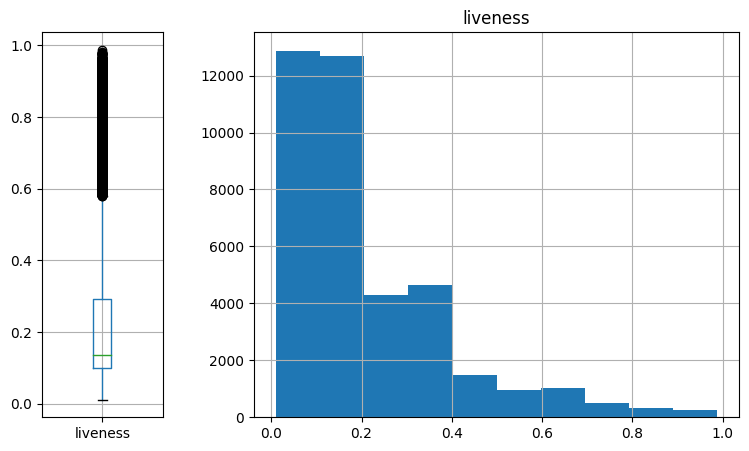

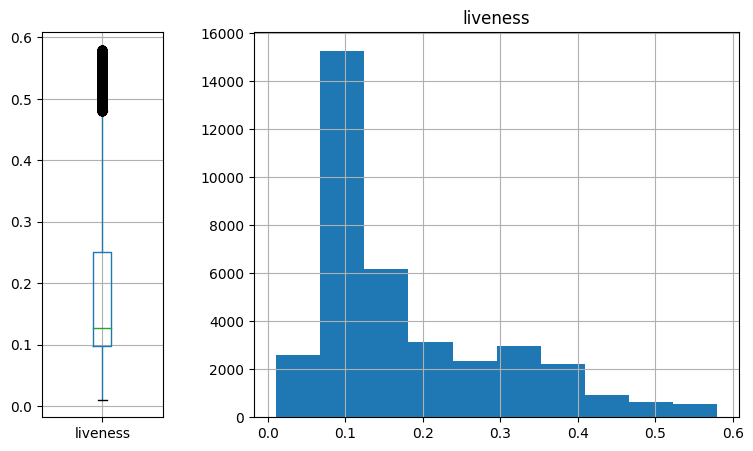

In [ ]:
col = 'liveness'
# col = 'speechiness'
Q1 = spotify2[col].quantile(0.25)
Q3 = spotify2[col].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

##############
small_outliers = spotify2[col] < (Q1 - 1.5 * IQR)
big_outliers = spotify2[col] > (Q3 + 1.5 * IQR)
print(sum(small_outliers), sum(big_outliers))

##############
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2.boxplot(column=col,ax=axes[0]);
spotify2.hist(column=col, ax=axes[1]);
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2[~(small_outliers | big_outliers)].boxplot(column=col,ax=axes[0]);
spotify2[~(small_outliers | big_outliers)].hist(column=col, ax=axes[1]);

In [ ]:
small_outliers = spotify2[col] < (Q1 - 1.5 * IQR)
big_outliers = spotify2[col] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

(0, 2317)

In [ ]:
spotify2[col][small_outliers | big_outliers].head()

14    0.619
24    0.689
28    0.658
59    0.587
80    0.657
Name: liveness, dtype: float64

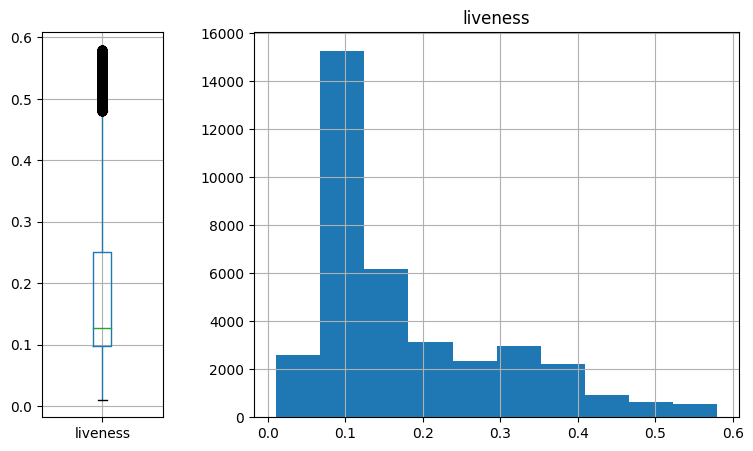

In [ ]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
spotify2[~(small_outliers | big_outliers)].boxplot(column=col,ax=axes[0]);
spotify2[~(small_outliers | big_outliers)].hist(column=col, ax=axes[1]);

***
## MUTLIVARIATE OUTLIERS


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

Text(0.5, 1.0, 'Multivariate Outliers Detection using Mahalanobis Distance')

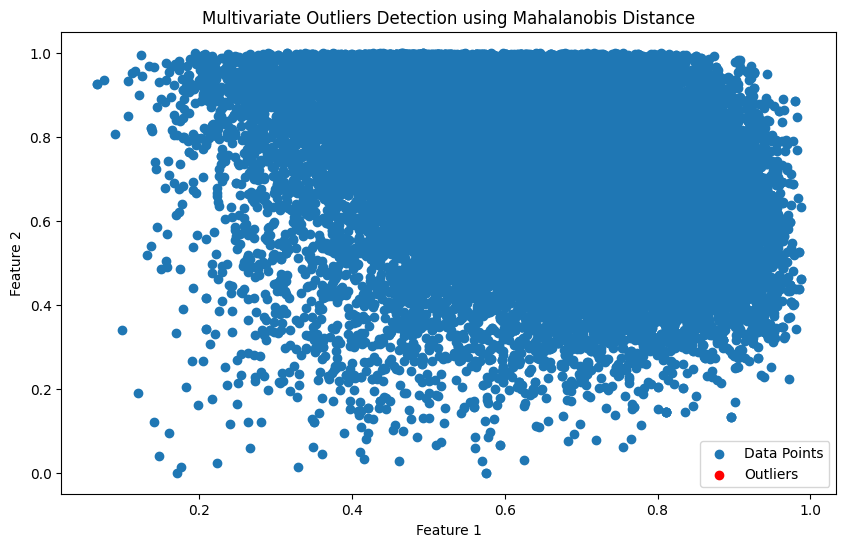

In [ ]:
# We take only numerical variables
numericals = spotify2.select_dtypes(include=np.number)

# Calculate the mean and covariance matrix of the dataset
mean_vector = numericals.mean()
cov_matrix = numericals.cov()

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate Mahalanobis distance for each data point
mahalanobis_dist = []
for i in range(len(numericals)):
    x_minus_mu = np.array(numericals.iloc[i, :] - mean_vector)
    mahalanobis_dist.append(np.sqrt(np.dot(np.dot(x_minus_mu.T, inv_cov_matrix), x_minus_mu)))

# Set the significance level (95% confidence)
alpha = 0.05
chi2_threshold = chi2.ppf(1 - alpha, df=numericals.shape[1])

moutliers = numericals.index[mahalanobis_dist > chi2_threshold]

plt.figure(figsize=(10, 6))
plt.scatter(numericals.iloc[:, 0], numericals.iloc[:, 1], label='Data Points')
plt.scatter(numericals.iloc[moutliers, 0], numericals.iloc[moutliers, 1], color='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Multivariate Outliers Detection using Mahalanobis Distance')
plt.legend()
plt.show()


***
## DERIVATION OF NEW VARIABLES: FEATURE EXTRACTION


In this section we are deriving new variables by combinating other already existed variables. We create the **vocal density** column which is derived from 'speechiness', which detects the presence of spoken words in a track and 'instrumentalness' which is related to whether a track contains no vocals (we convert it to tracks containing vocals). So, vocal_density = 1 - instrumentalness - speechiness. We also create the **vocal expression** feature which represents the emotional expression conveyed through vocals, by combining 'speechiness' and 'valence' (vocal_expression = speechiness * valence.)

In [ ]:
spotify2.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1        0.420         0.060   
1         0.719   0.493    8    -7.230     1        0.079         0.401   
2         0.850   0.893    5    -4.783     1        0.062         0.014   
3         0.476   0.781    0    -4.710     1        0.103         0.024   
4         0.798   0.624    2    -7.668     1        0.293         0.217   

   instrumentalness  liveness  valence    tempo                      id  \
0         1.340e-02     0.056    0.389  156.985  2Vc6NJ9PW9gD9q343XFRKx   
1         0.000e+00     0.118    0.124  115.080  7pgJBLVz5VmnL7uGHmRj6p   
2         4.140e-06     0.372    0.039  218.050  0vSWgAlfpye0WCGeNmuNhy   
3         0.000e+00     0.114    0.175  186.948  0VSXnJqQkwuH2ei1nOQ1nu   
4         0.000e+00     0.166    0.591  147.988  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...       124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...       224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...        98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...       123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...       123298   

   time_signature      genre                                          title  
0               4  Dark Trap                            Mercury: Retrograde  
1               4  Dark Trap                                      Pathology  
2               4  Dark Trap                                       Symbiote  
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)  
4               4  Dark Trap                                          Venom

In [ ]:
spotify2['vocal_density'] = 1 - spotify2['instrumentalness'] - spotify2['speechiness']
spotify2[['vocal_density','instrumentalness','speechiness']].head()

vocal_density  instrumentalness  speechiness
0          0.567         1.340e-02        0.420
1          0.921         0.000e+00        0.079
2          0.938         4.140e-06        0.062
3          0.897         0.000e+00        0.103
4          0.707         0.000e+00        0.293

In [ ]:
spotify2['vocal_expression'] = spotify2['speechiness'] * spotify2['valence']
spotify2[['vocal_expression','valence','speechiness']].head()

vocal_expression  valence  speechiness
0             0.163    0.389        0.420
1             0.010    0.124        0.079
2             0.002    0.039        0.062
3             0.018    0.175        0.103
4             0.173    0.591        0.293

***
## FEATURE SELECTION


There are some columns **not useful** in our dataset, and some others that might not be important for our genre target. We are exploring our features and remove some features. Feature selection algorithms are used.

In [ ]:
spotify2.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1        0.420         0.060   
1         0.719   0.493    8    -7.230     1        0.079         0.401   
2         0.850   0.893    5    -4.783     1        0.062         0.014   
3         0.476   0.781    0    -4.710     1        0.103         0.024   
4         0.798   0.624    2    -7.668     1        0.293         0.217   

   instrumentalness  liveness  valence  ...                      id  \
0         1.340e-02     0.056    0.389  ...  2Vc6NJ9PW9gD9q343XFRKx   
1         0.000e+00     0.118    0.124  ...  7pgJBLVz5VmnL7uGHmRj6p   
2         4.140e-06     0.372    0.039  ...  0vSWgAlfpye0WCGeNmuNhy   
3         0.000e+00     0.114    0.175  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4         0.000e+00     0.166    0.591  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

   time_signature      genre                                          title  \
0               4  Dark Trap                            Mercury: Retrograde   
1               4  Dark Trap                                      Pathology   
2               4  Dark Trap                                       Symbiote   
3               3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4               4  Dark Trap                                          Venom   

  vocal_density  vocal_expression  
0         0.567             0.163  
1         0.921             0.010  
2         0.938             0.002  
3         0.897             0.018  
4         0.707             0.173  

[5 rows x 21 columns]

We observed that there are some titles more than once and up to hudnreads. We check some of them and we see that they also share the genre feature but they differ in all other columns. This with the combination of the titles make us think that they are playlists. Either way, we decide to drop string columns like id, uri, track_href, analysis_url and title, because they do not offer any help in predicting genre value.

In [ ]:
spotify2['title'].value_counts()

title
Euphoric Hardstyle                   1236
UKF Drum & Bass - All Uploads         812
Top Trance Songs EVER                 752
Dark Techno Rave                      630
I'm a fucking Headbanger              595
                                     ... 
Electric Body (feat. ScHoolboy Q)       1
Too Eazy                                1
Newport Reds                            1
Anthrax                                 1
Tru Colors                              1
Name: count, Length: 15571, dtype: int64

In [ ]:
test = spotify2[spotify2['title']=='Dark Techno Rave']
test['genre'].value_counts()

genre
techno    630
Name: count, dtype: int64

In [ ]:
spotify2.drop(['id','uri','track_href','analysis_url','title'],axis=1,inplace=True)
spotify2.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1        0.420         0.060   
1         0.719   0.493    8    -7.230     1        0.079         0.401   
2         0.850   0.893    5    -4.783     1        0.062         0.014   
3         0.476   0.781    0    -4.710     1        0.103         0.024   
4         0.798   0.624    2    -7.668     1        0.293         0.217   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0         1.340e-02     0.056    0.389  156.985       124539               4   
1         0.000e+00     0.118    0.124  115.080       224427               4   
2         4.140e-06     0.372    0.039  218.050        98821               4   
3         0.000e+00     0.114    0.175  186.948       123661               3   
4         0.000e+00     0.166    0.591  147.988       123298               4   

       genre  vocal_density  vocal_expression  
0  Dark Trap          0.567             0.163  
1  Dark Trap          0.921             0.010  
2  Dark Trap          0.938             0.002  
3  Dark Trap          0.897             0.018  
4  Dark Trap          0.707             0.173

In [ ]:
# If we check again duplicates after the removal of the above columns, there are almost 1000 rows duplicated. We drop them
temp = spotify2.drop_duplicates(keep='first')
print(spotify2.shape)
print(temp.shape)
print('Observations dropped:', spotify2.shape[0]-temp.shape[0])
spotify2=temp

(39081, 16)
(38119, 16)
Observations dropped: 962


Now we will use some feature selection algorithms to **measure the importance** of the features. We have to keep in mind that these algorithms only deal with numerical features. Thus, we have not transformed *ordinal* numerical to categorical (e.g. key, mode, time_signarute). We are doing that in the next section

**Mutual Information**:

Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative, and is zero if and only if the input and output feature are independent. It can capture non-linear relationships between input and output feature.

This algorithm finds mode, time_signature and key to not be important for the genre target. However since they are not numerical columns, the algorithm might do not understand their patters. However the most important  features are tempo, duration_ms, instrumentalness and vocal_density, while all the others are considered somewhat important.

In [ ]:
X = spotify2.drop(['genre'], axis=1)
y = spotify2['genre']

<Axes: >

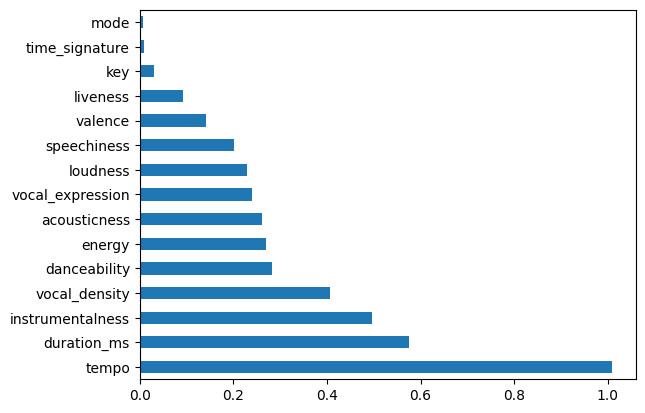

In [ ]:
MI_score = mutual_info_classif(X, y, random_state=0)
feat_importances = pd.Series(MI_score, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

ExtraTreesClassifier:

Extra Trees Classifier is a form of ensemble learning technique that integrates the classification outcomes from various decision trees, which are then gathered in a forest. Feature selection is used to determine the degree of relationship between independent features and dependent features.

The results here are not that different. Again time_signature, mode and key are in the bottom 3, but they are considered more important than Mutual Information considers them (especially key). Also, the top ones are similar, with tempo duration_ms and instrumentalness on the top. The difference is that the importance of vocal_density dropped. All the other features are considered important as well

ExtraTreesClassifier()

[0.08585365 0.07596349 0.03879665 0.07162977 0.01369663 0.05647817
 0.05793952 0.08828736 0.05017893 0.06353472 0.16595919 0.10264605
 0.00885321 0.06357899 0.05660366]


<Axes: >

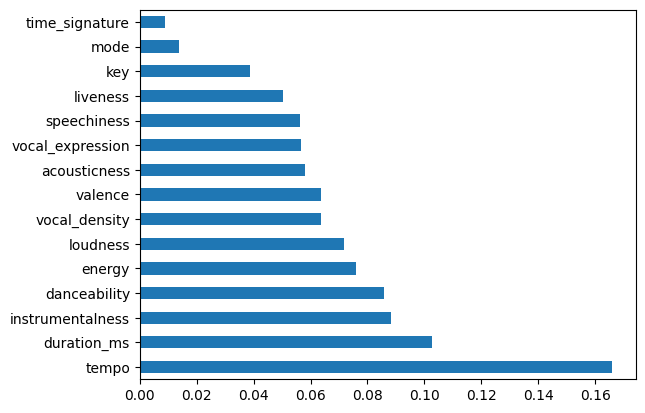

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

Now we are checking the **correlation** of all features. Maybe some that are highly correlated among them should not be kept due to redundant information.

There is **high correlation** with the *new extracted features*. For example, **vocal_density** has a negative correlation with instrumentalness of -0.94 and **vocal expression** has a positive correlation with speechiness (0.81) and valence (0.61). This makes perfect sense, since these values combination created the others. Should they be kept though? Also in the importance above, even though they are important they are below some feature that created them. For example isntrumentalness is more important than vocal_density in both algorithms and valence is more important than vocal_expression only in ExtraTrees while in Mutual Information, vocal_expression is more important than valence and speechiness. For now, we will keep these features and test later in a machine learning algorithm if they help our model learn better patterns and then decide what to keep.

<Figure size 1500x1500 with 0 Axes>

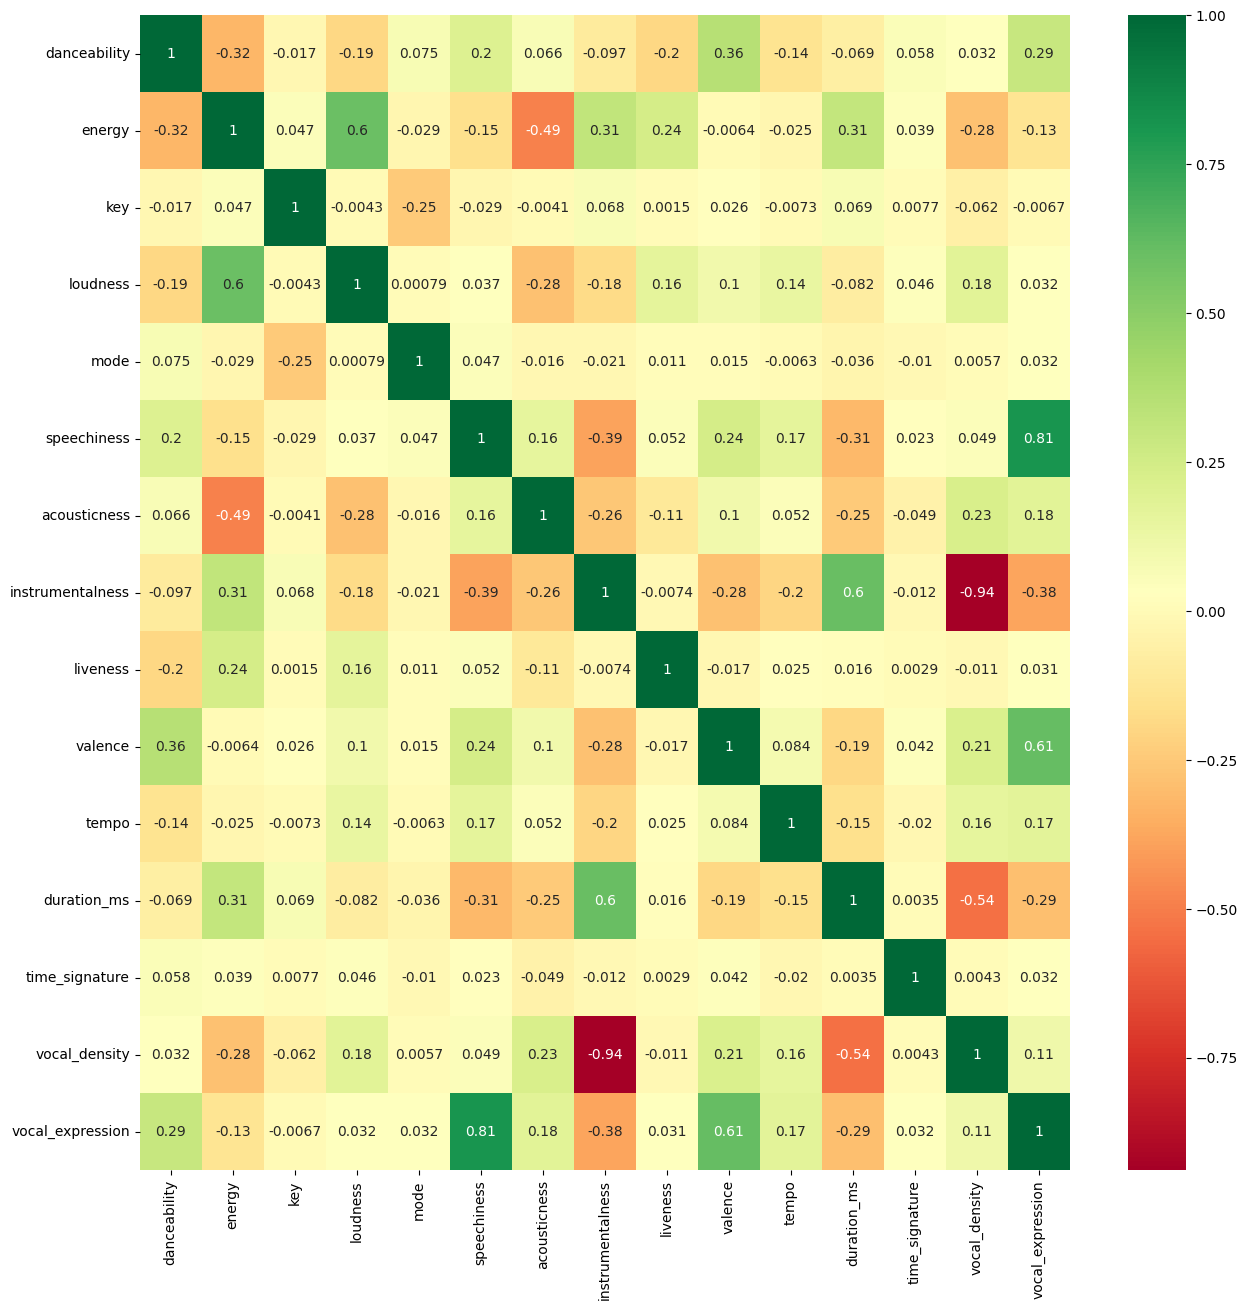

In [ ]:
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The feature importance algorithms indicate that mode, time_signature might not be informative. Mutual information also treat key variable is non-informative. Thus, we perform a countplot for the categorical and a histogram for the numerical variables compared to the genre feature, which is our target. We  can see for all our features if the different classes of genre can be separated by different values of each feature. In general we can see distinct clusters in our variables, but we confirm that mode and time_signature features are not informative regarding the different genres. Mode takes two different values and all the classes of genre are similarily distributed while the same happens for the 4 distinct values of time_signature. However, for the key feature we see that there might be some patters for different keys. Thus we decide to drop mode and time_signature.

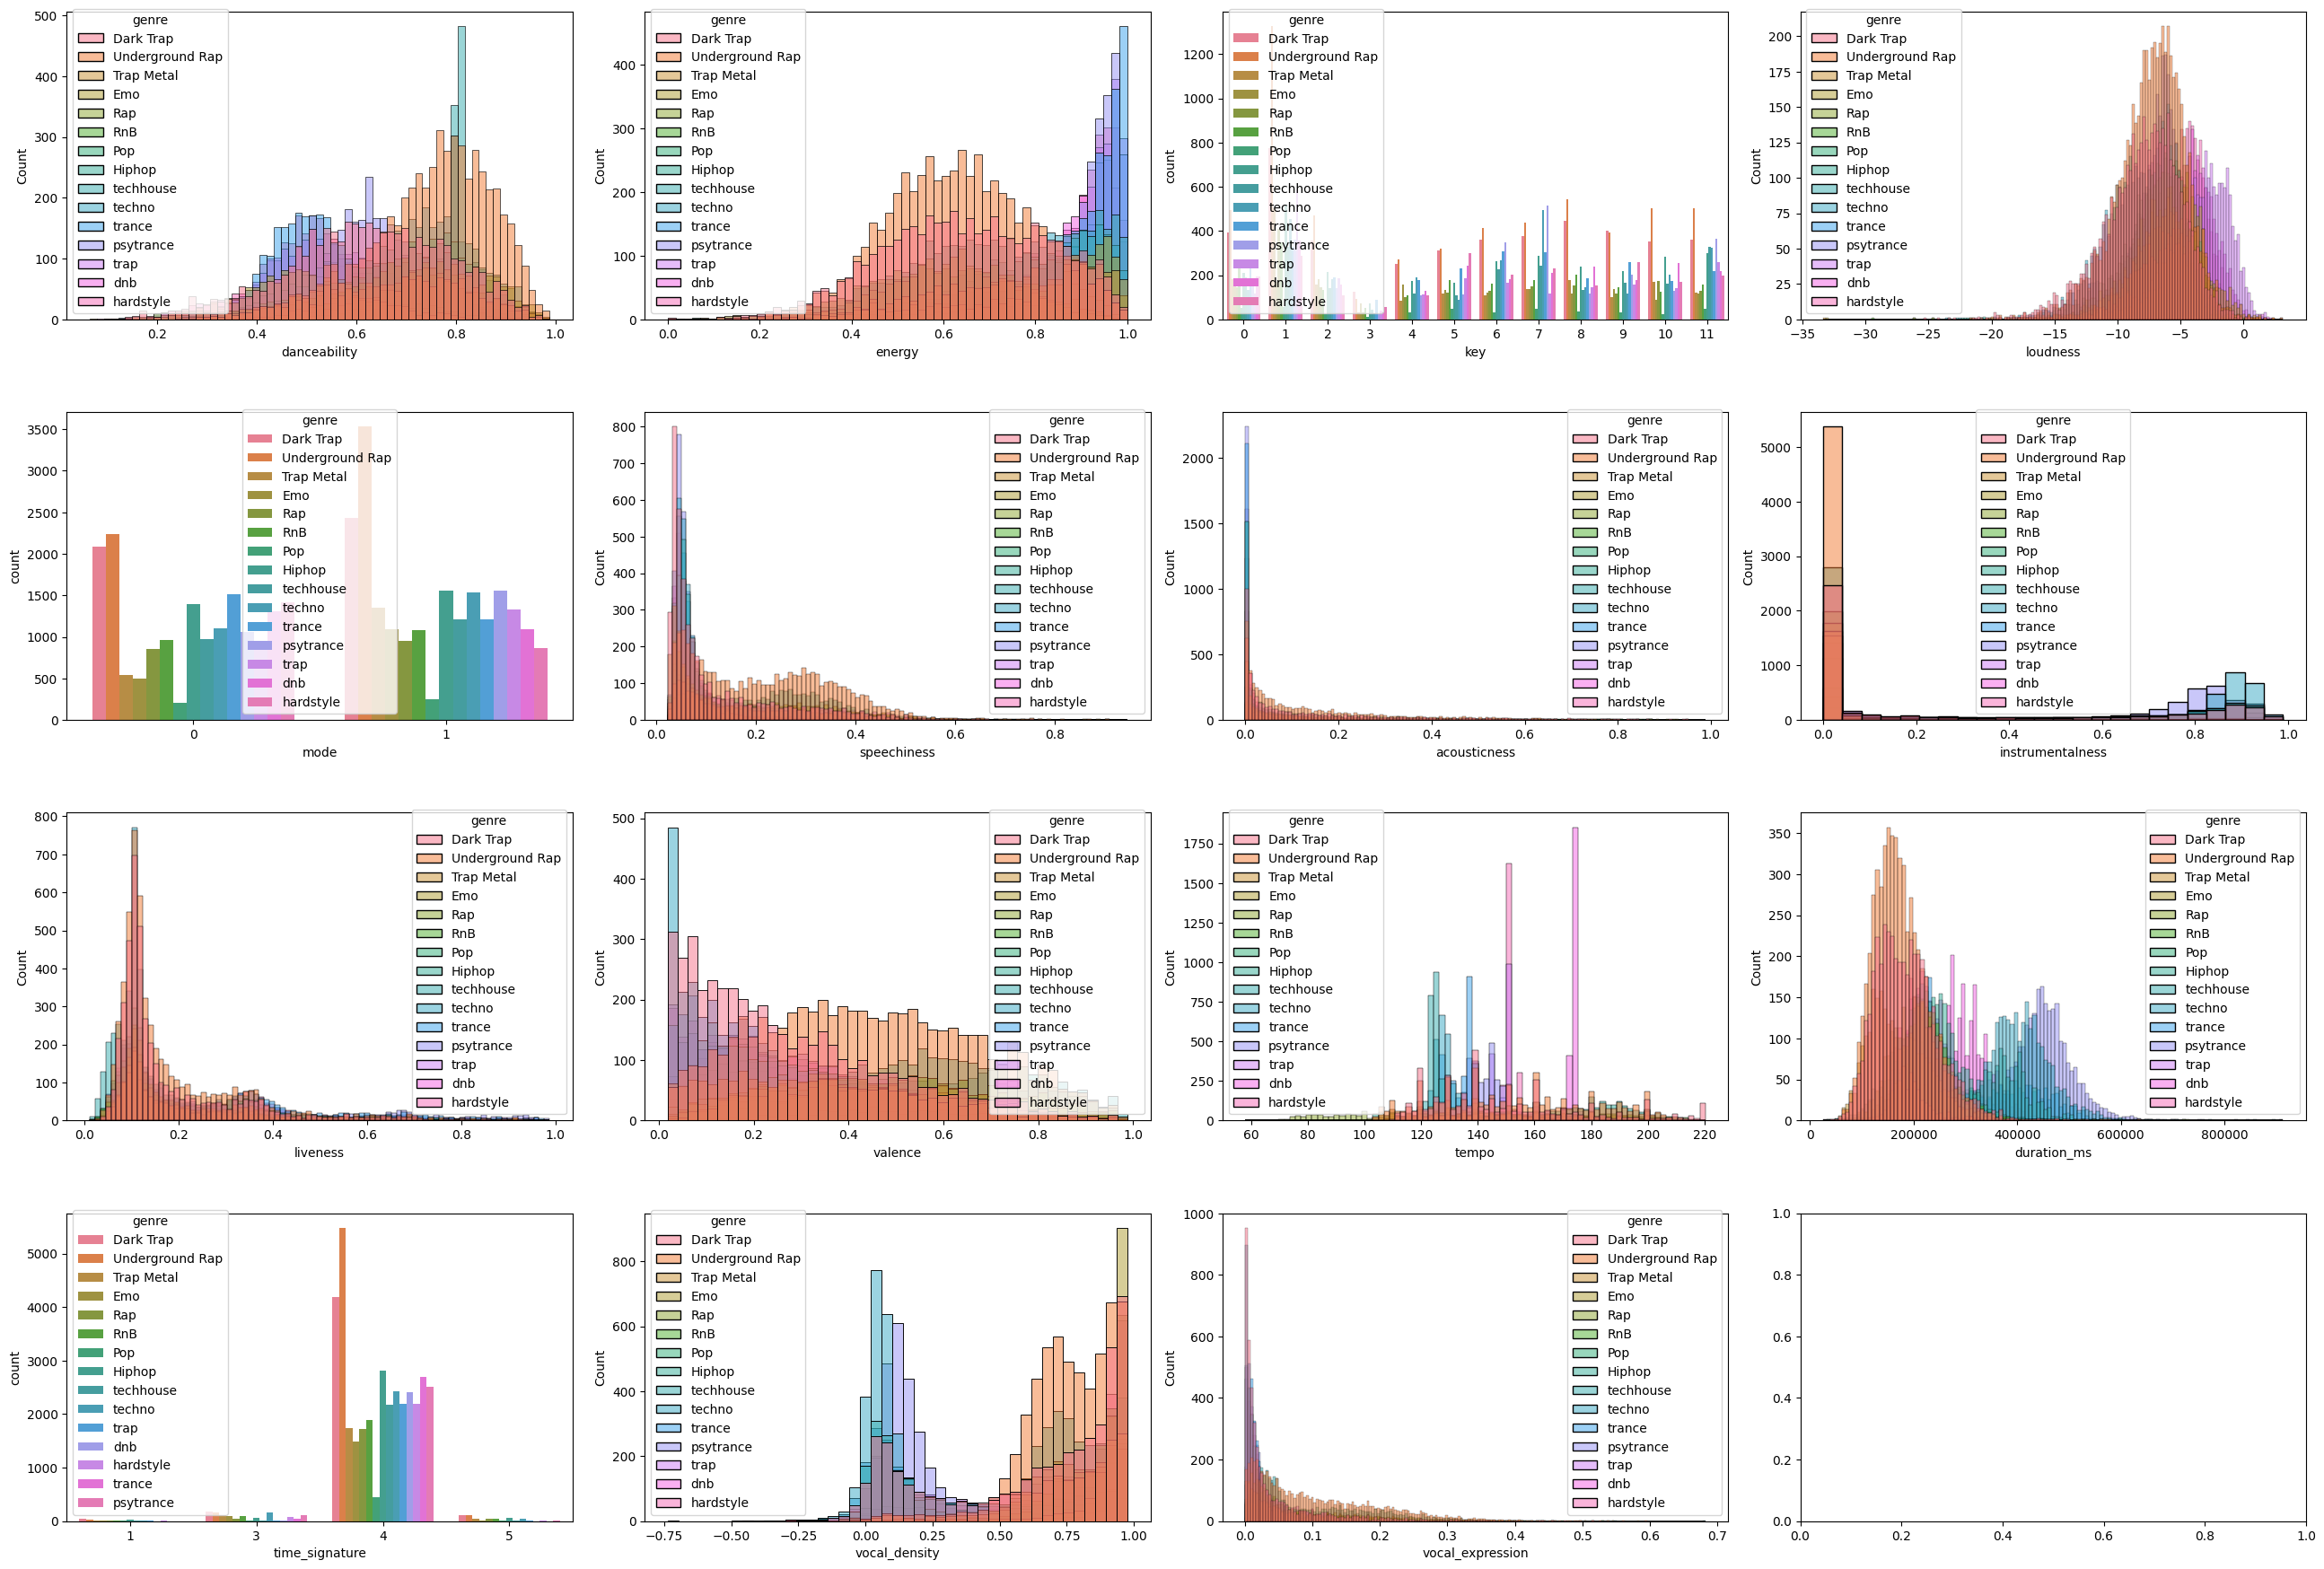

In [ ]:
fig, axes = plt.subplots(4,4,figsize=(26,18));

for i, c in enumerate(spotify2.drop('genre',axis=1)):
    ax = axes.reshape(-1)[i]
    if c in ['mode','key','time_signature']:
        a = sns.countplot(x=c,data=spotify2, ax=ax, hue='genre');
    else:
        sns.histplot(x=c,data=spotify2, hue='genre',ax=ax);
plt.tight_layout();

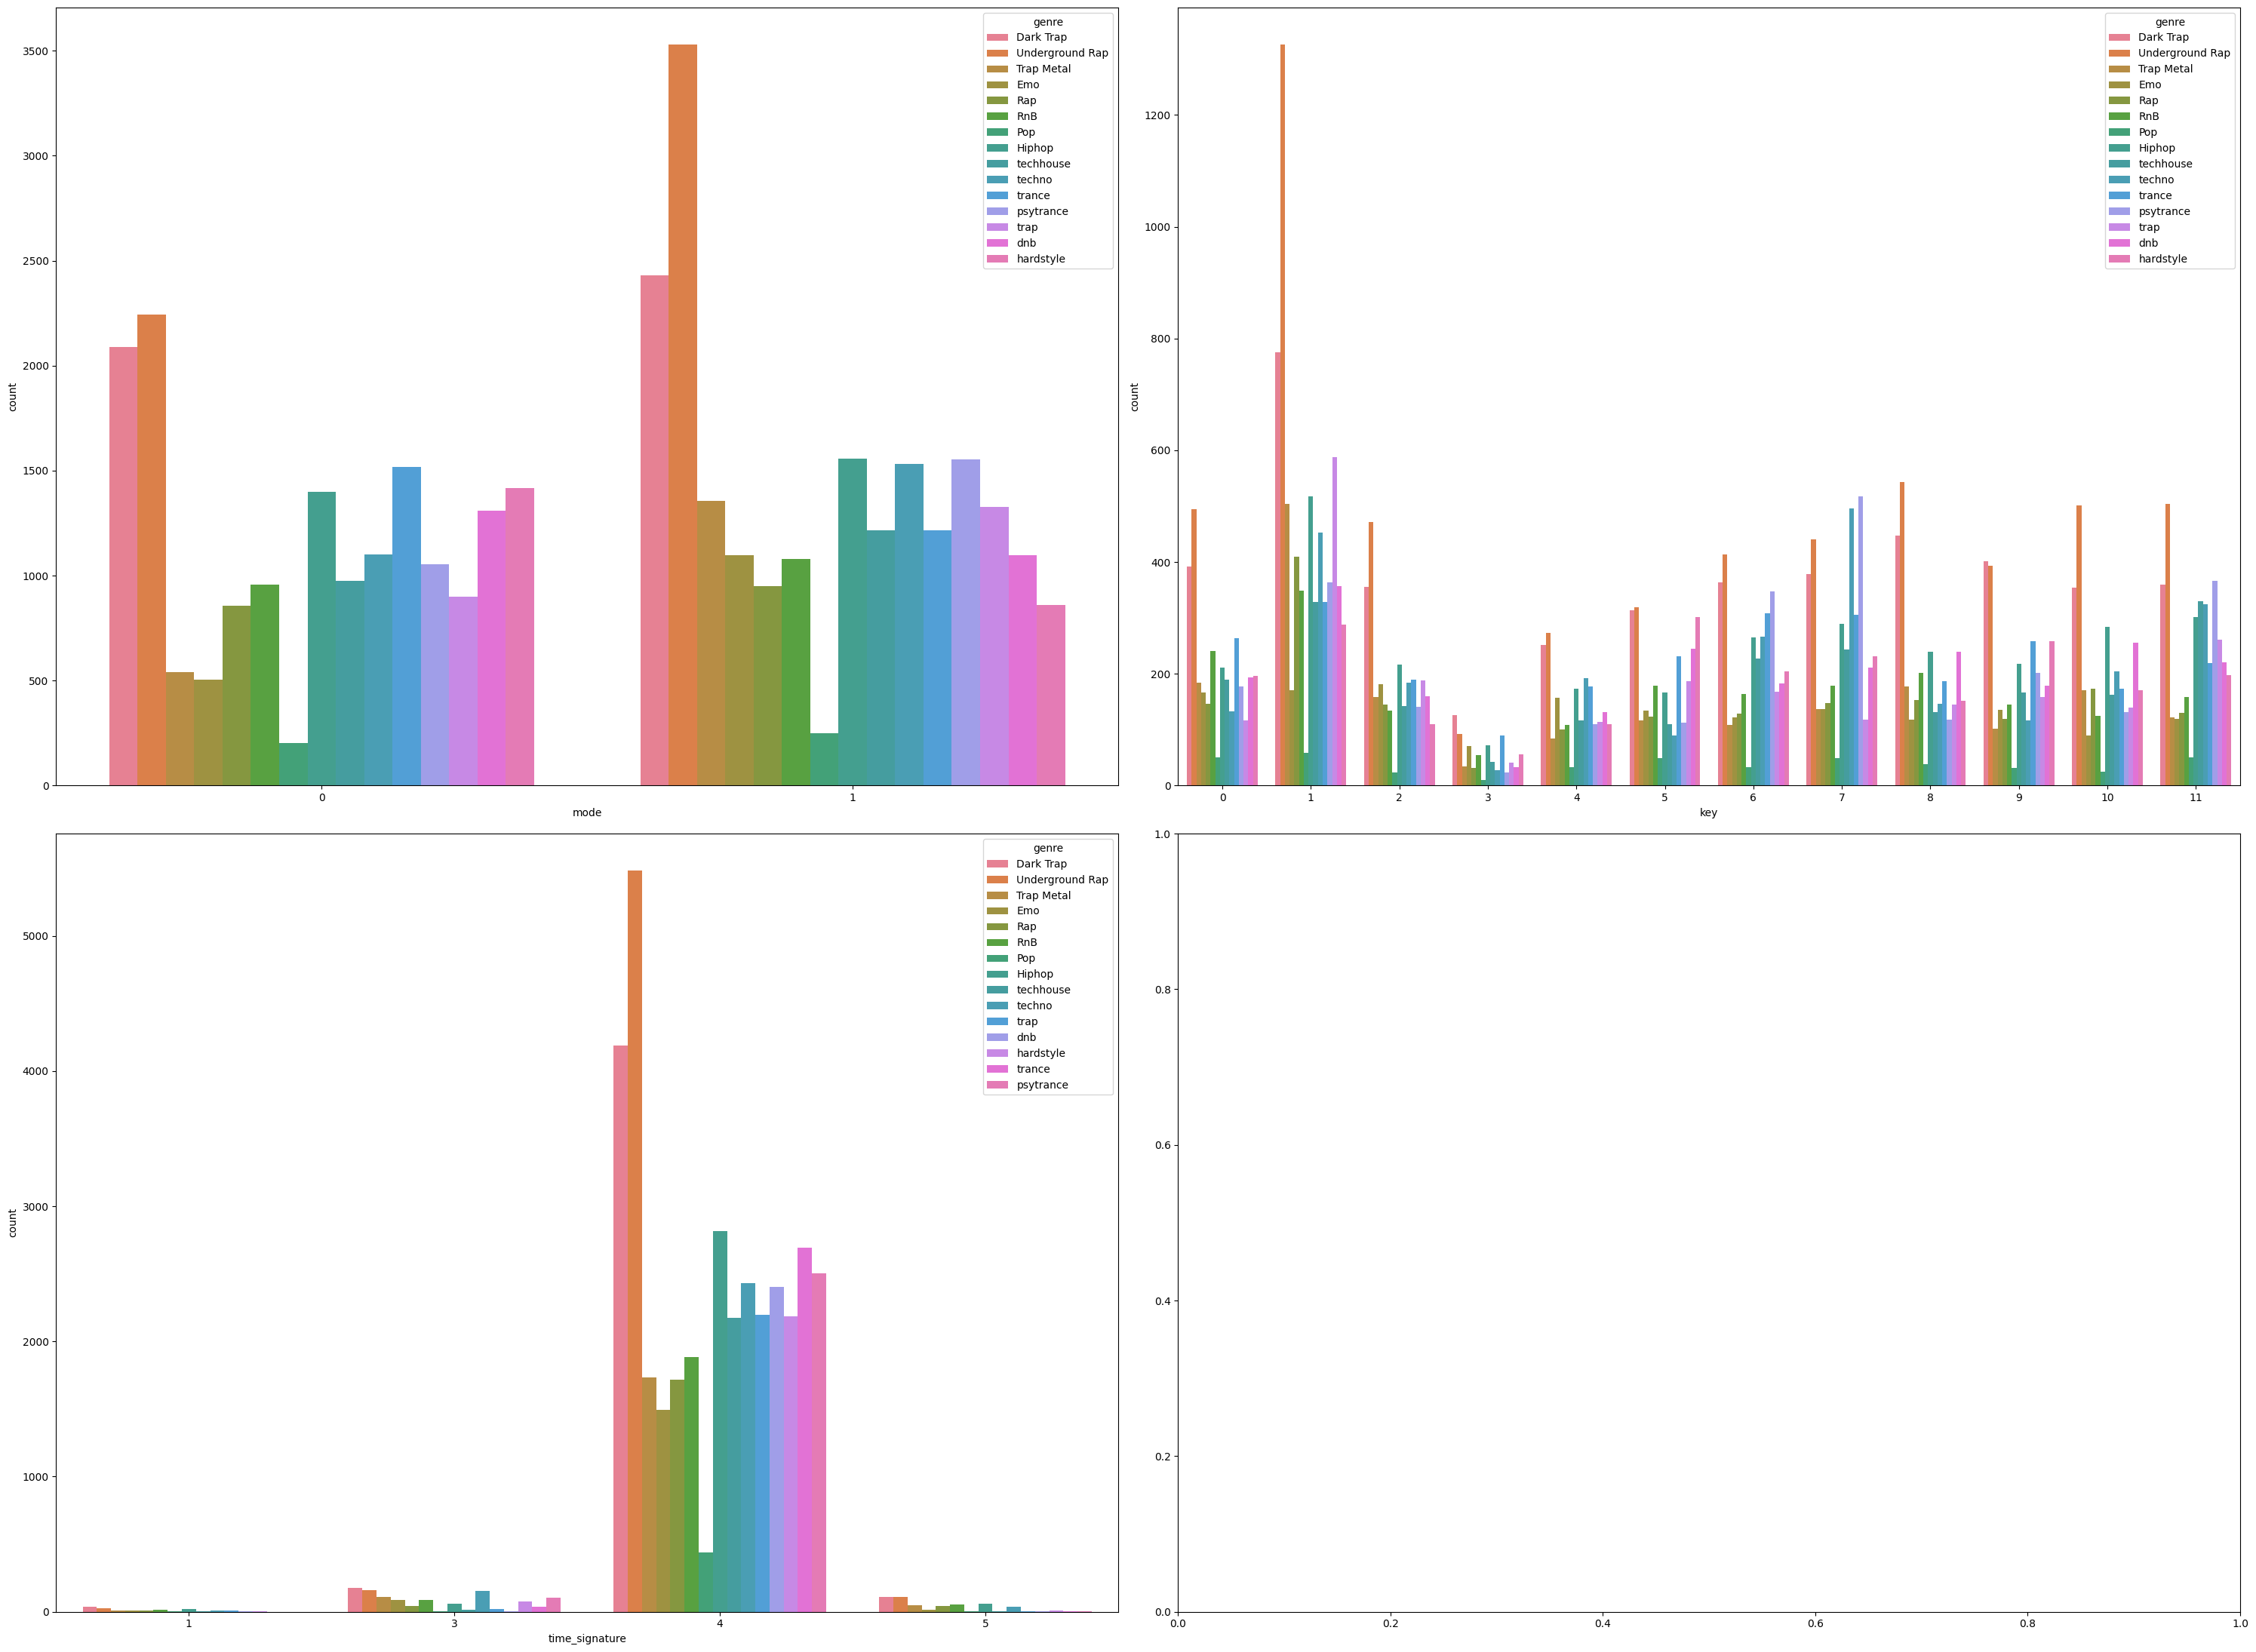

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(30,22));

for i, c in enumerate(spotify2[['mode','key','time_signature']]):
    ax = axes.reshape(-1)[i]
    a = sns.countplot(x=c,data=spotify2, ax=ax, hue='genre');
plt.tight_layout();

In [ ]:
spotify2.drop(['mode','time_signature'],axis=1,inplace=True)
spotify2.head()

danceability  energy  key  loudness  speechiness  acousticness  \
0         0.831   0.814    2    -7.364        0.420         0.060   
1         0.719   0.493    8    -7.230        0.079         0.401   
2         0.850   0.893    5    -4.783        0.062         0.014   
3         0.476   0.781    0    -4.710        0.103         0.024   
4         0.798   0.624    2    -7.668        0.293         0.217   

   instrumentalness  liveness  valence    tempo  duration_ms      genre  \
0         1.340e-02     0.056    0.389  156.985       124539  Dark Trap   
1         0.000e+00     0.118    0.124  115.080       224427  Dark Trap   
2         4.140e-06     0.372    0.039  218.050        98821  Dark Trap   
3         0.000e+00     0.114    0.175  186.948       123661  Dark Trap   
4         0.000e+00     0.166    0.591  147.988       123298  Dark Trap   

   vocal_density  vocal_expression  
0          0.567             0.163  
1          0.921             0.010  
2          0.938             0.002  
3          0.897             0.018  
4          0.707             0.173

What is the value distribution in genre after the removal of some rows?

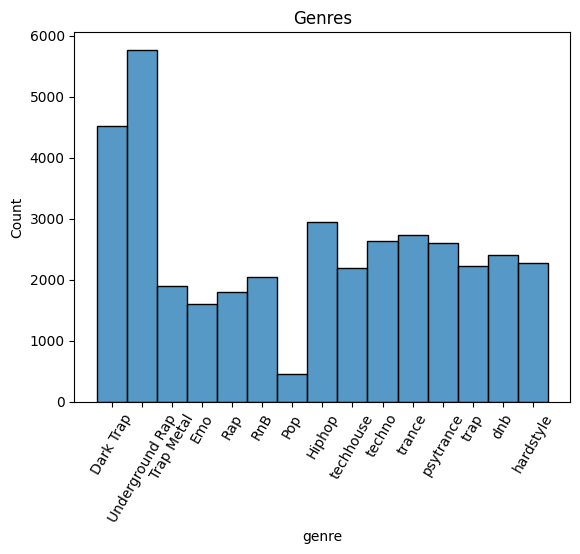

In [ ]:
ax = sns.histplot(spotify2["genre"])
ax = plt.xticks(rotation=60)
ax = plt.title("Genres")

***
## TRANSFORMATIONS
First we check the range of values for the numerical variables using boxplot.


In [ ]:
num_cols = spotify2.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)

['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'vocal_density', 'vocal_expression']


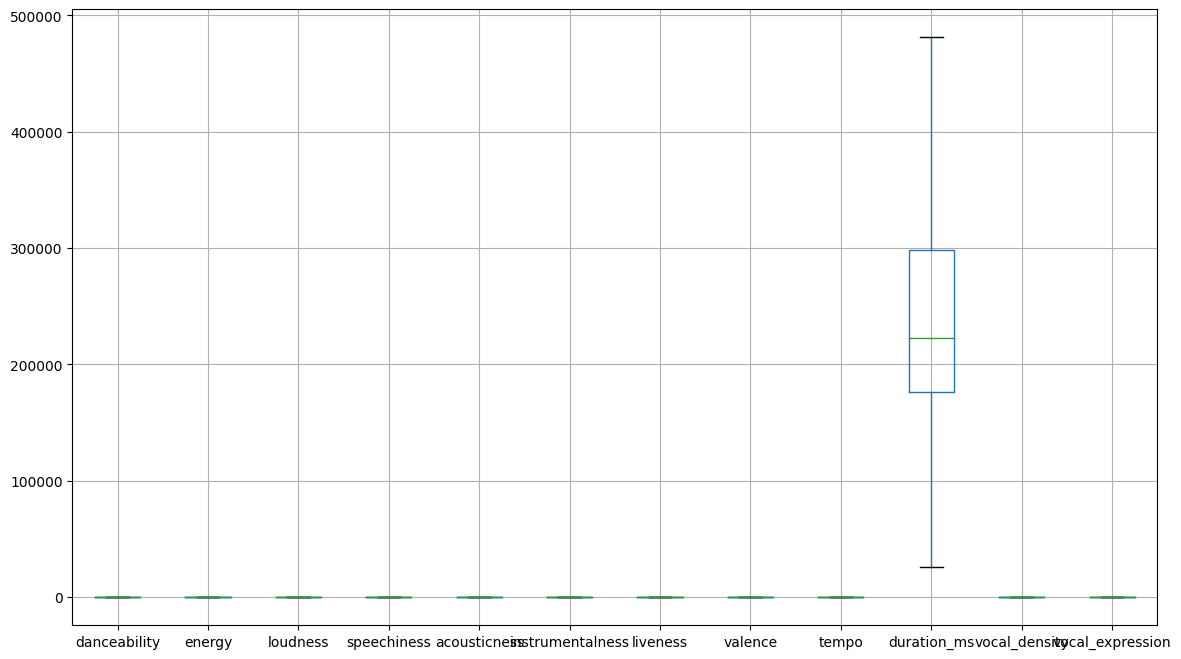

In [ ]:
spotify2.loc[:,num_cols].boxplot(figsize=(14,8),showfliers=False);

Looking at the figure, it seems all the variables are in similar value range exccept duration_ms column, so we repeat this step without this column

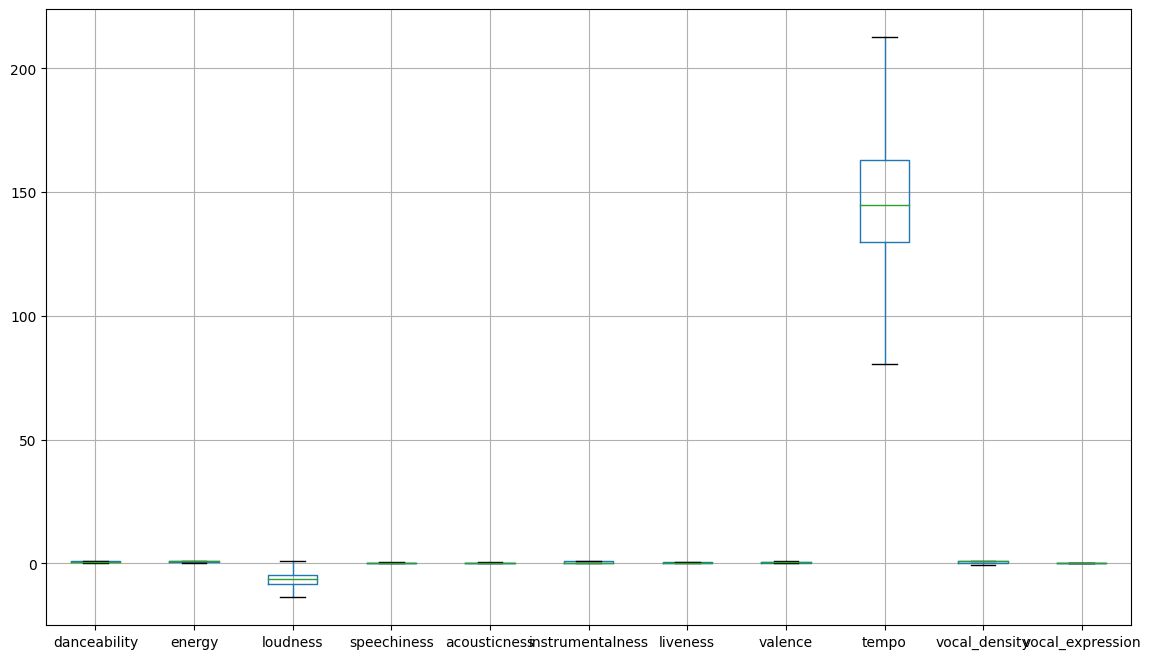

In [ ]:
filtered_cols = [col for col in num_cols if col != 'duration_ms']
spotify2.loc[:,filtered_cols].boxplot(figsize=(14,8),showfliers=False);

As can be observed, there are more variables with ranges too far away

### Testing new categorical variables
It would be interesting how the different numerical variables behave when transformed into categorical ones, so we proceeded to test them.

In [ ]:
spotify3 = spotify2
cat_new = []

In [ ]:
danceability_bins = [0, 0.5, 0.75, 1]
danceability_labels = ['low', 'medium', 'high']
spotify3['danceability_category'] = pd.cut(spotify3['danceability'], bins=danceability_bins, labels=danceability_labels)
cat_new.append('danceability_category')

In [ ]:
energy_bins = [0, 0.5, 0.75, 1]
energy_labels = ['low', 'medium', 'high']
spotify3['energy_category'] = pd.cut(spotify3['energy'], bins=energy_bins, labels=energy_labels)
cat_new.append('energy_category')

In [ ]:
speechiness_bins = [0, 0.2, 0.4, 1]
speechiness_labels = ['low', 'medium', 'high']
spotify3['speechiness_category'] = pd.cut(spotify3['speechiness'], bins=speechiness_bins, labels=speechiness_labels)
cat_new.append('speechiness_category')

In [ ]:
loudness_bins = [-35, -10, -5, 0]
loudness_labels = ['low', 'medium', 'high']
spotify3['loudness_category'] = pd.cut(spotify3['loudness'], bins=loudness_bins, labels=loudness_labels)
cat_new.append('loudness_category')

In [ ]:
acousticness_bins = [0, 0.2, 0.4, 1]
acousticness_labels = ['low', 'medium', 'high']
spotify3['acousticness_category'] = pd.cut(spotify3['acousticness'], bins=acousticness_bins, labels=acousticness_labels)
cat_new.append('acousticness_category')

In [ ]:
instrumentalness_bins = [0, 0.3, 0.7, 1]
instrumentalness_labels = ['low', 'medium', 'high']
spotify3['instrumentalness_category'] = pd.cut(spotify3['instrumentalness'], bins=instrumentalness_bins, labels=instrumentalness_labels)
cat_new.append('instrumentalness_category')

In [ ]:
liveness_bins = [0, 0.3, 0.6, 1]
liveness_labels = ['low', 'medium', 'high']
spotify3['liveness_category'] = pd.cut(spotify3['liveness'], bins=liveness_bins, labels=liveness_labels)
cat_new.append('liveness_category')

In [ ]:
valence_bins = [0, 0.3, 0.6, 1]
valence_labels = ['low', 'medium', 'high']
spotify3['valence_category'] = pd.cut(spotify3['valence'], bins=valence_bins, labels=valence_labels)
cat_new.append('valence_category')

In [ ]:
tempo_bins = [60, 125, 160, 220]
tempo_labels = ['low', 'medium', 'high']
spotify3['tempo_category'] = pd.cut(spotify3['tempo'], bins=tempo_bins, labels=tempo_labels)
cat_new.append('tempo_category')

In [ ]:
duration_ms_bins = [0, 150000, 250000, 450000, 800000]
duration_ms_labels = ['short', 'medium', 'long','very_long']
spotify3['duration_ms_category'] = pd.cut(spotify3['duration_ms'], bins=duration_ms_bins, labels=duration_ms_labels)
cat_new.append('duration_ms_category')

In [ ]:
vocal_density_bins = [-0.25, 0.25, 0.75, 1]
vocal_density_labels = ['low', 'medium', 'high']
spotify3['vocal_density_category'] = pd.cut(spotify3['vocal_density'], bins=vocal_density_bins, labels=vocal_density_labels)
cat_new.append('vocal_density_category')

In [ ]:
vocal_expression_bins = [0, 0.15, 0.3, 1]
vocal_expression_labels = ['very_low', 'low', 'medium']
spotify3['vocal_expression_category'] = pd.cut(spotify3['vocal_expression'], bins=vocal_expression_bins, labels=vocal_expression_labels)
cat_new.append('vocal_expression_category')

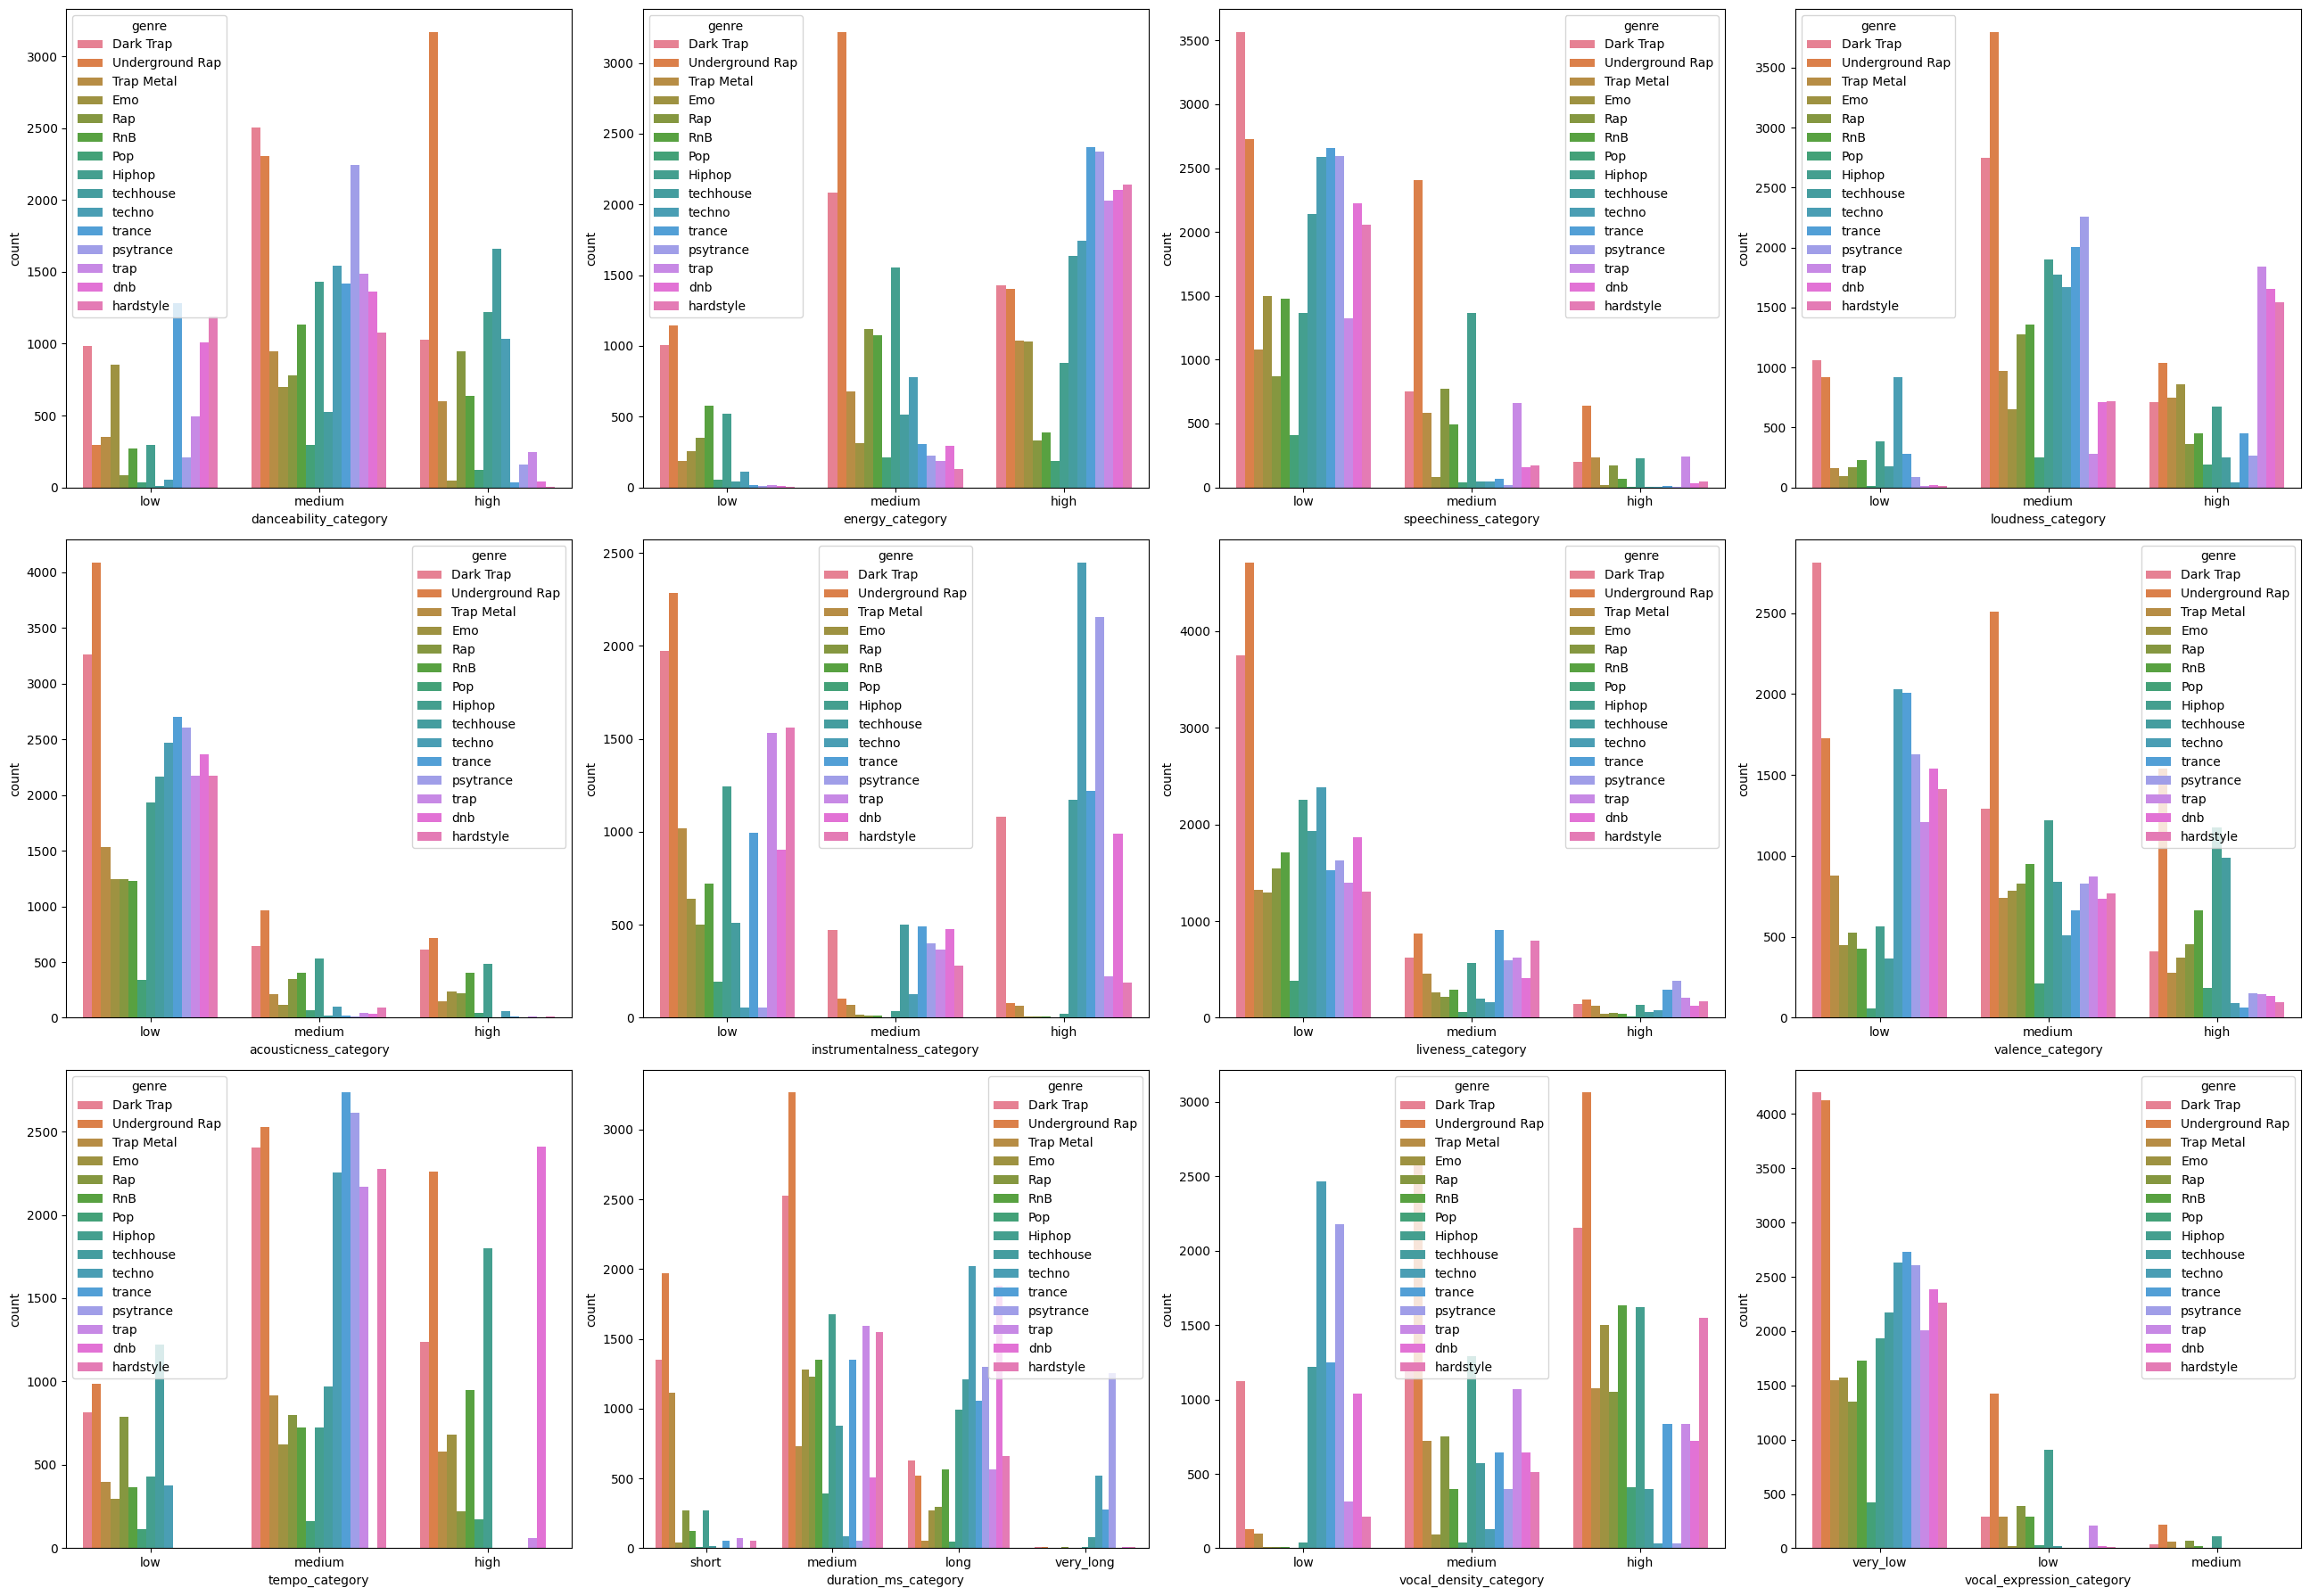

In [ ]:
fig, axes = plt.subplots(3,4,figsize=(26,18));

for i, c in enumerate(spotify3[cat_new]):
    ax = axes.reshape(-1)[i]
    a = sns.countplot(x=c,data=spotify3, ax=ax, hue='genre');
plt.tight_layout();

### Variable comparison of most significant features

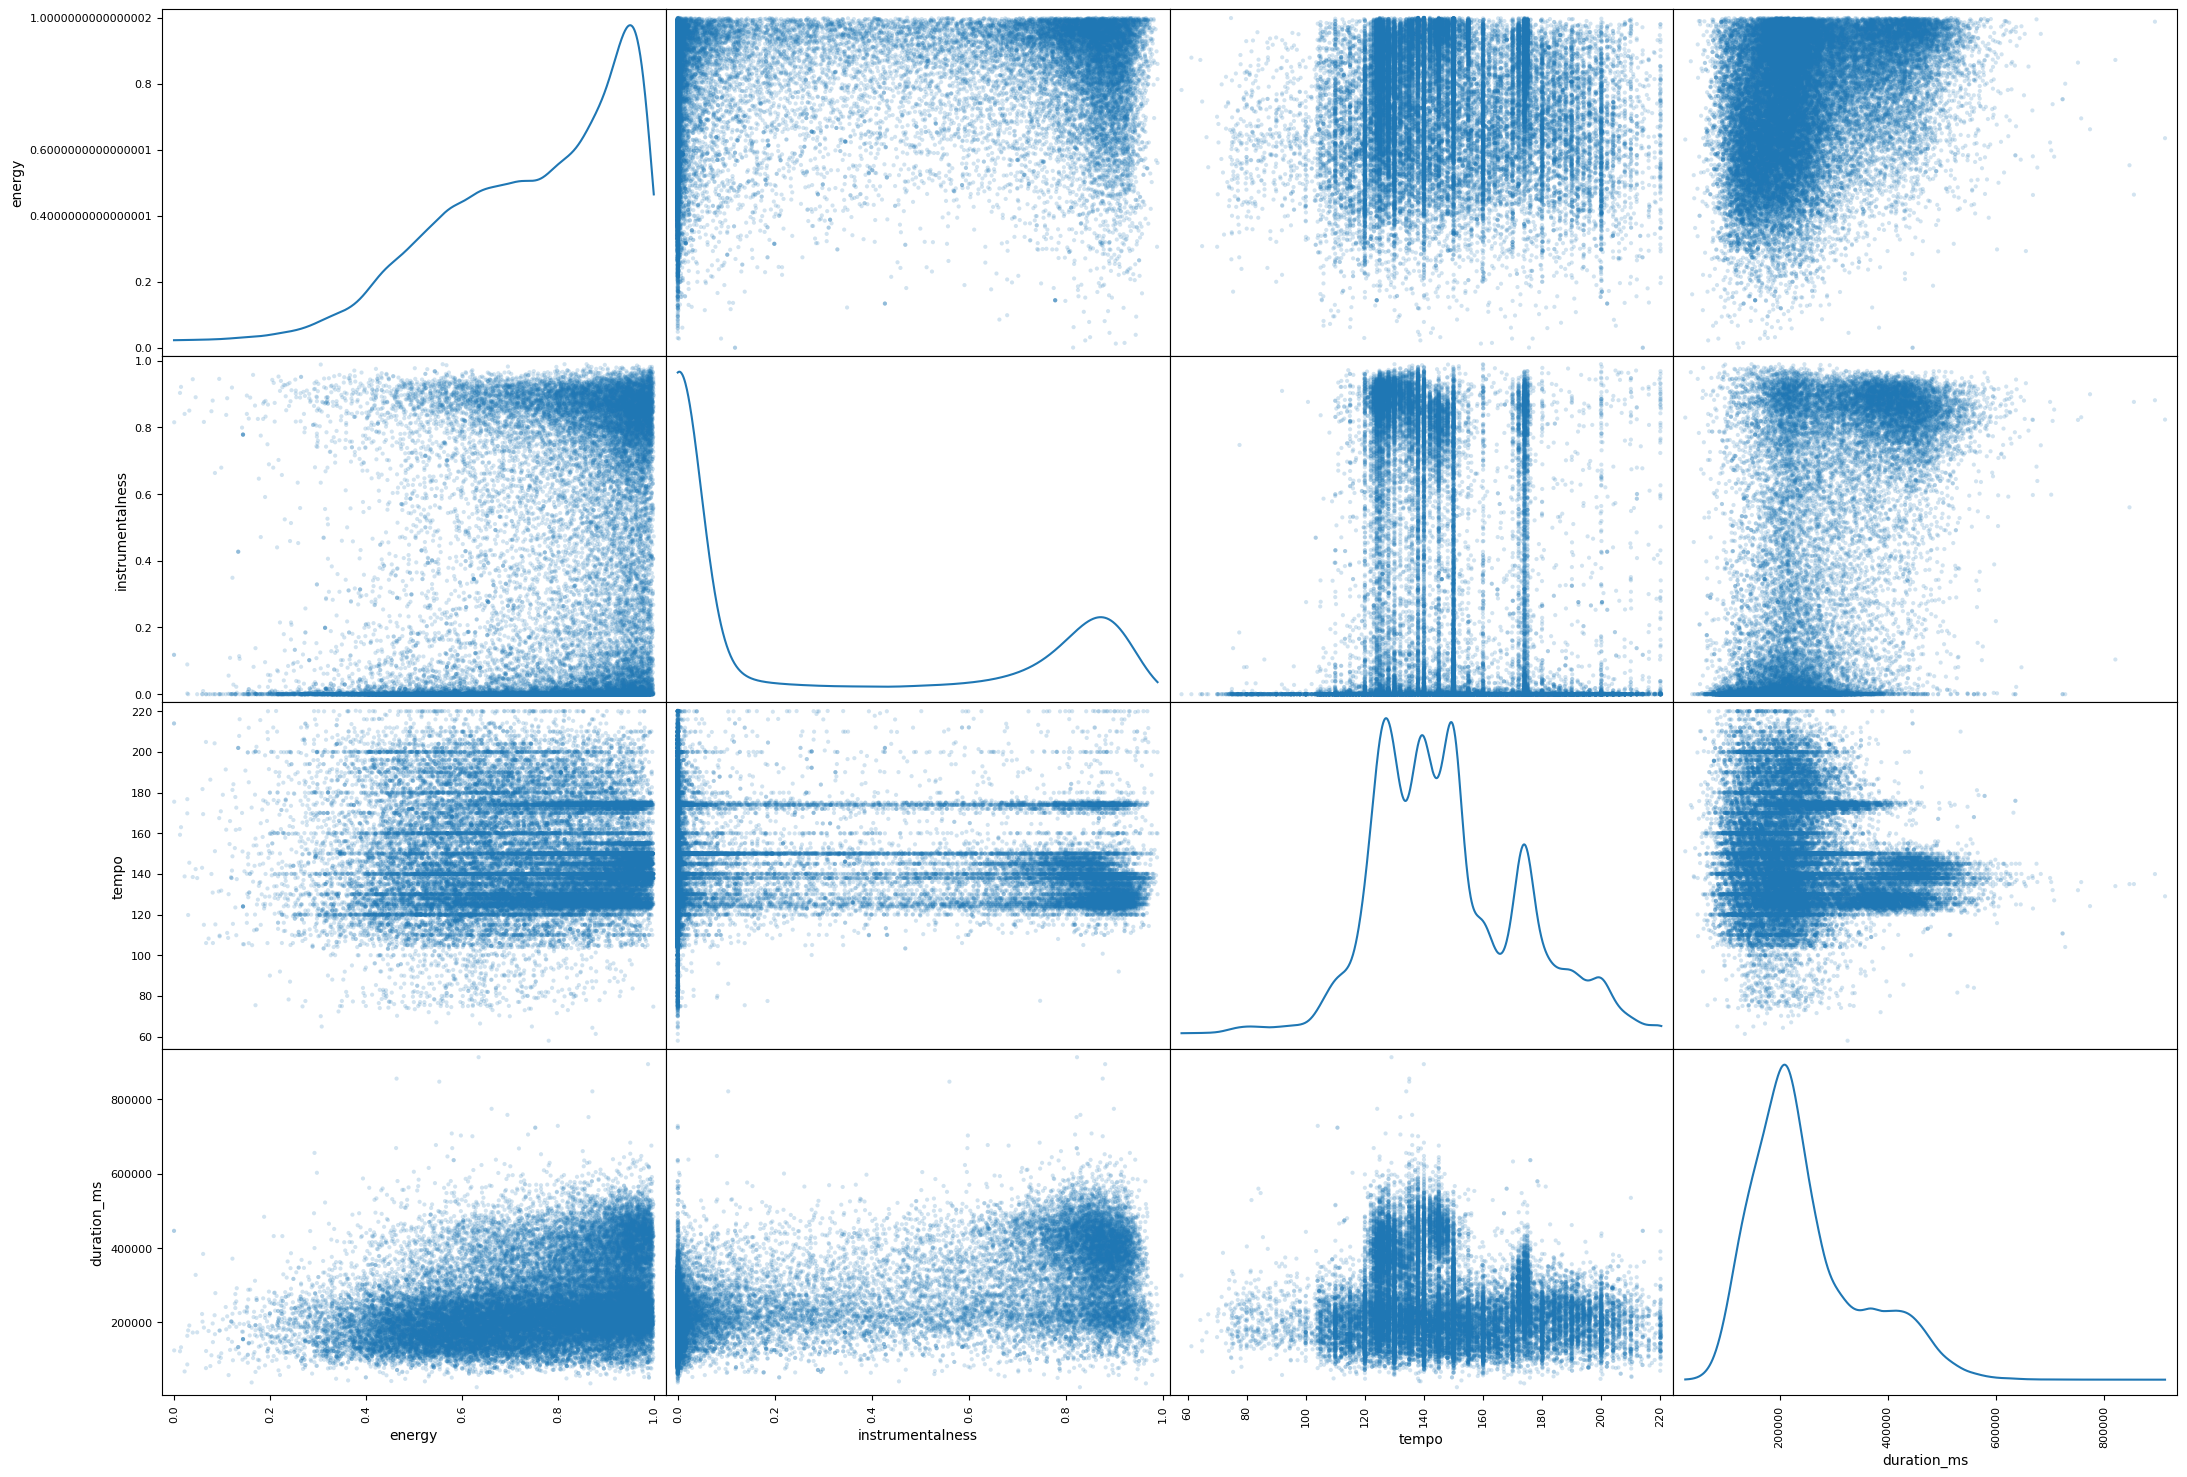

In [ ]:
scatter_matrix(spotify2.loc[:,['energy','instrumentalness','tempo', 'duration_ms']],
               alpha=0.2, figsize=(26, 18),
               diagonal='kde', marker='.');

We can take a closer look at the variables once they are normalized

### Normalization and gaussianity

We decided to min-max scaler to get the different variables to be in the same range

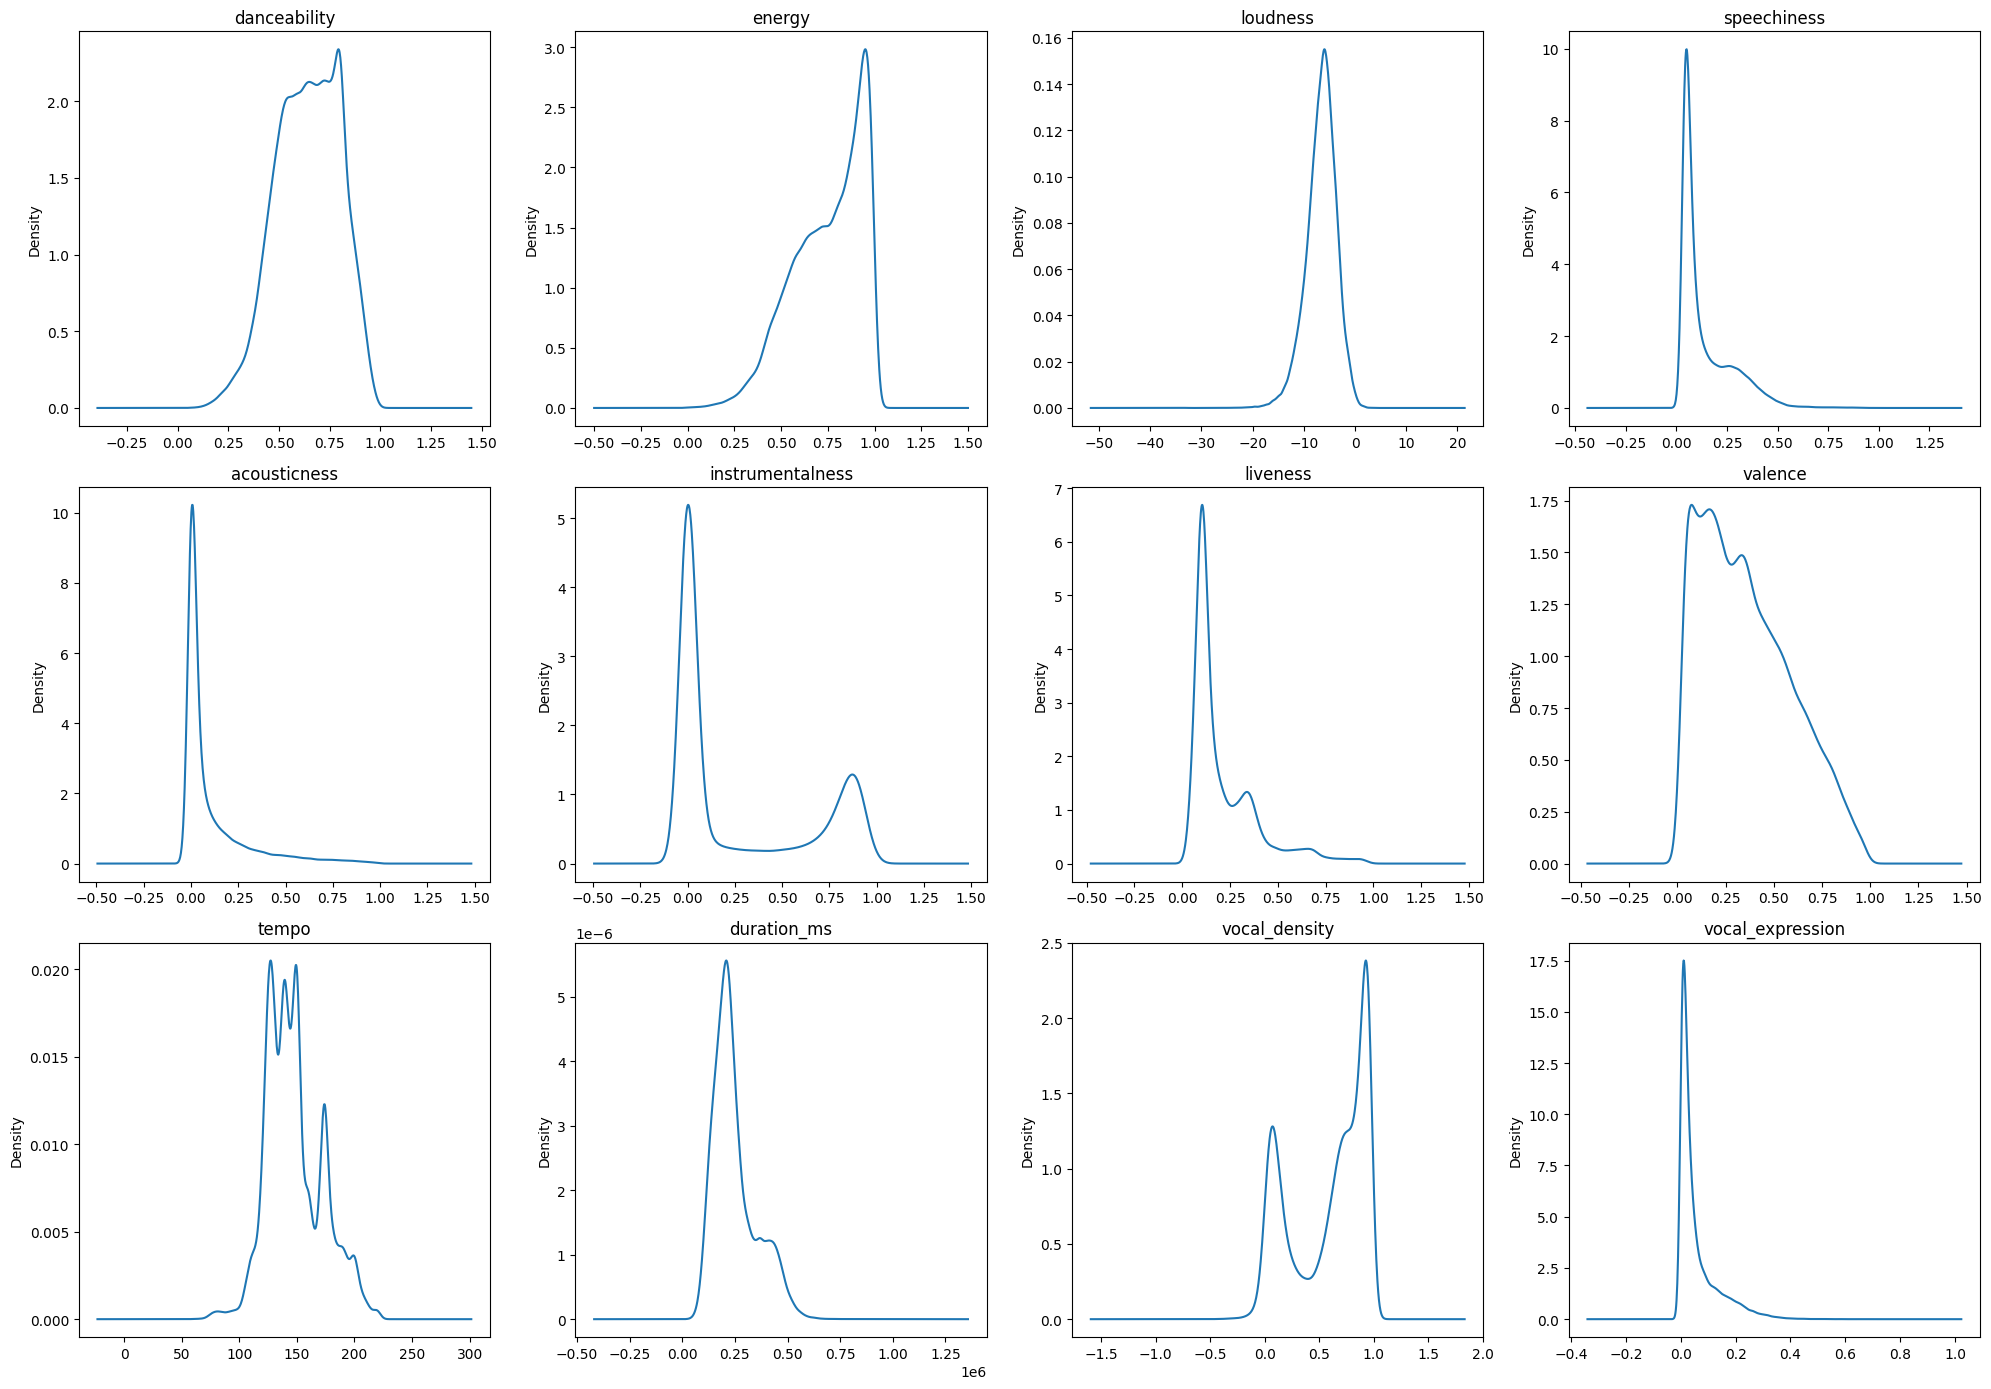

In [ ]:
fig = plt.figure(figsize=(20,14))
for i, c in enumerate(num_cols):
    ax = fig.add_subplot(3, 4, i+1)
    spotify2[c].plot.kde(ax=ax)
    plt.title(c)
fig.tight_layout();

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'danceability')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'energy')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'loudness')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'speechiness')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'acousticness')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'instrumentalness')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'liveness')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'valence')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'tempo')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'duration_ms')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'vocal_density')

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'vocal_expression')

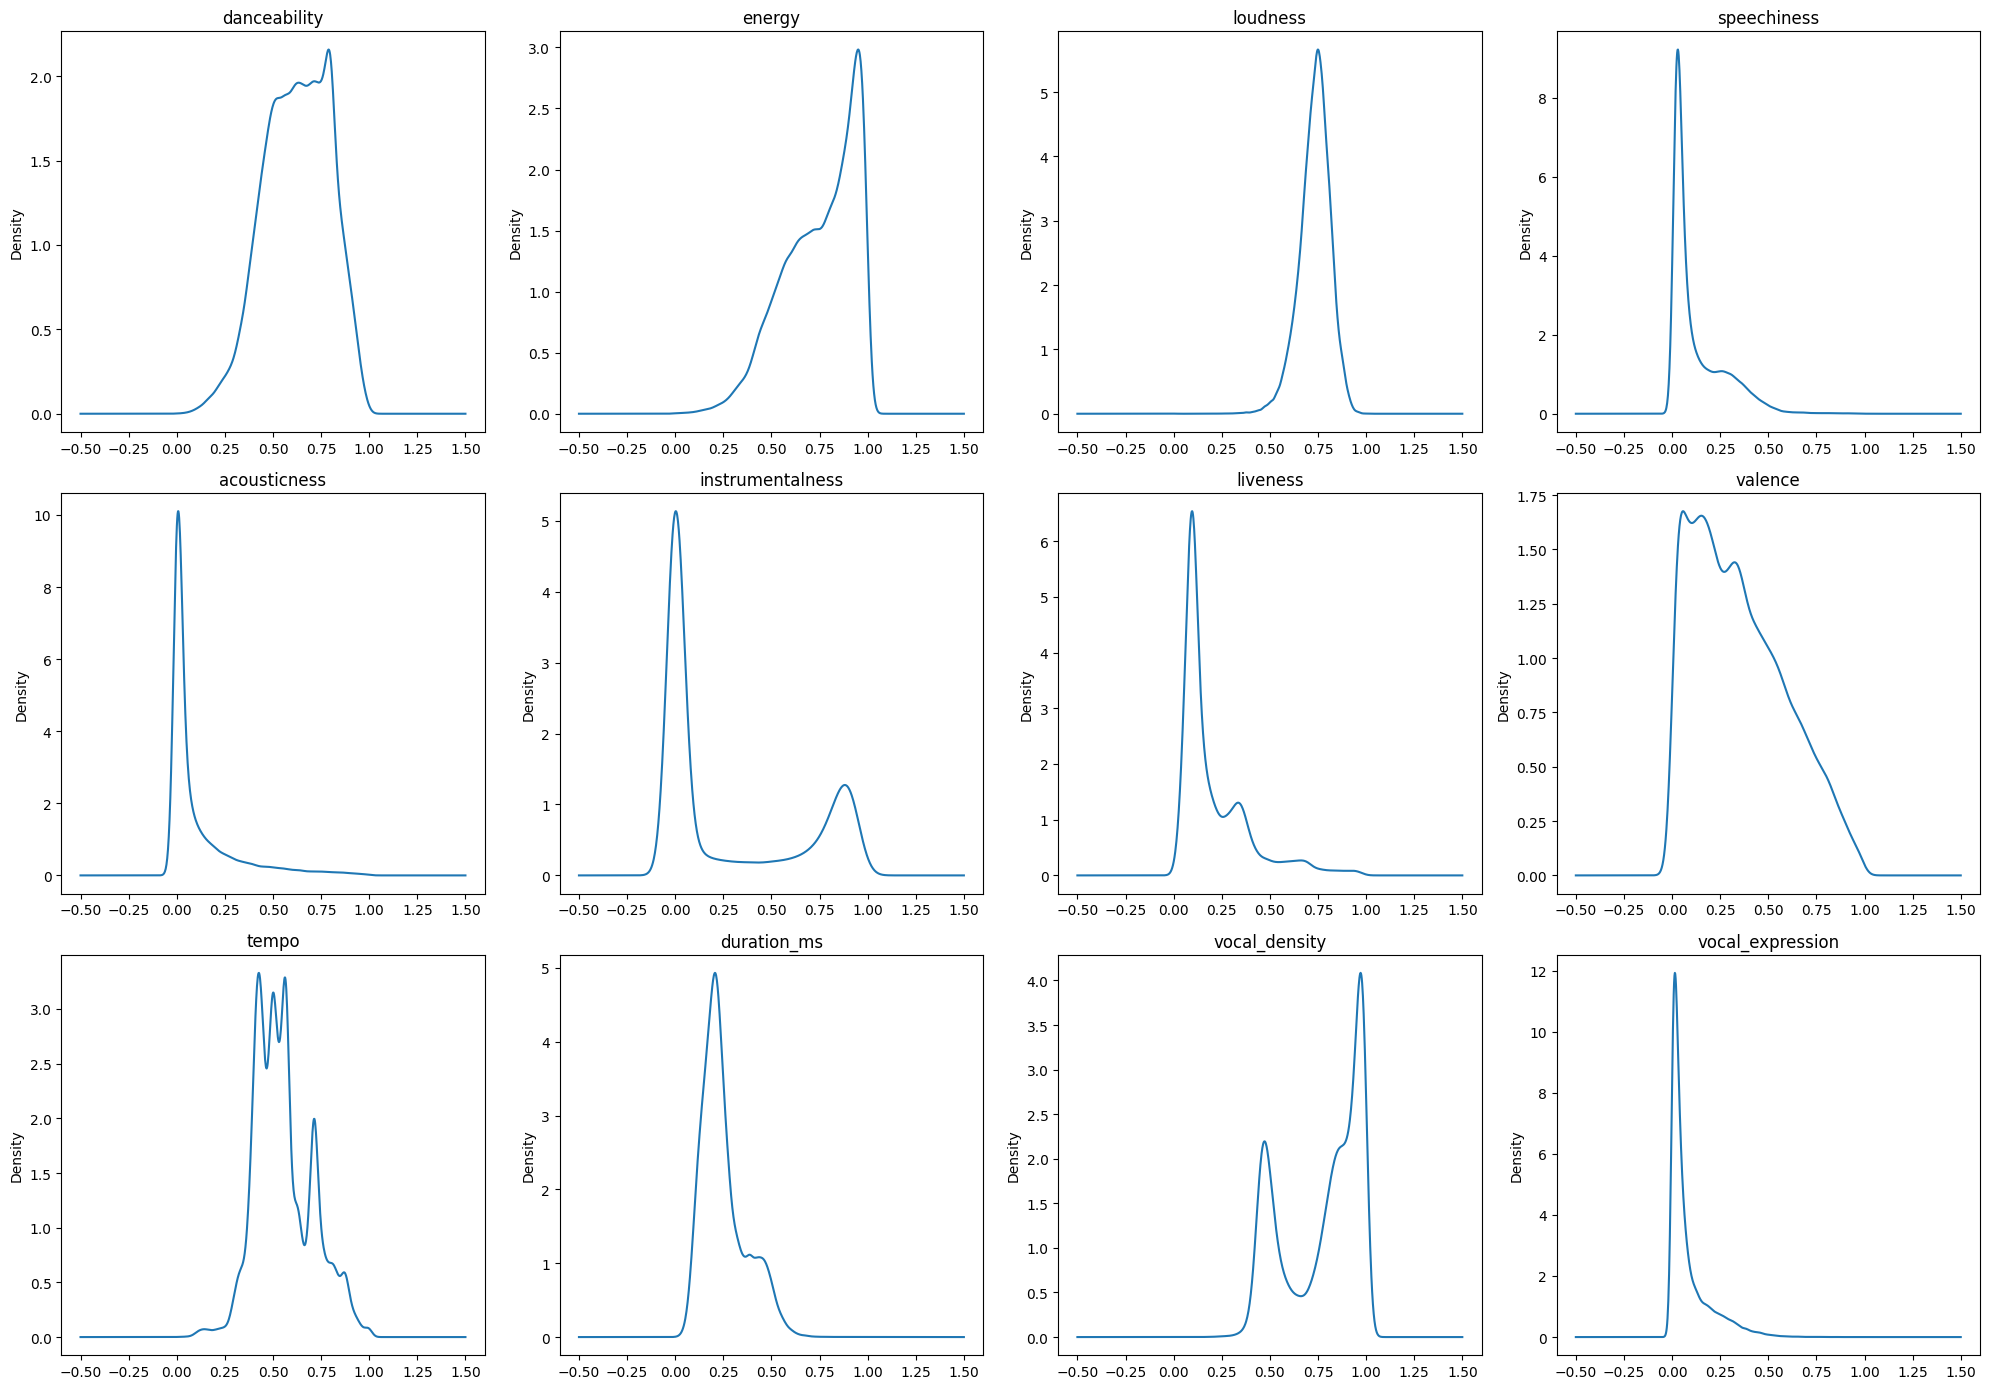

In [ ]:
fig = plt.figure(figsize=(20,14))
spotify2_transformed = pd.DataFrame()
min_max_scaler =  preprocessing.MinMaxScaler()
spotify2 = spotify2.reset_index(drop=True)
spotify2_transformed = spotify2.copy()
spotify2_transformed[num_cols] = min_max_scaler.fit_transform(spotify2[num_cols])

for i, c in enumerate(num_cols):
    ax = fig.add_subplot(3, 4, i+1)
    spotify2_transformed[c].plot.kde(ax=ax)
    ax.set_title(c)
fig.tight_layout()
plt.show()

<Axes: xlabel='danceability', ylabel='Count'>

<Axes: xlabel='energy', ylabel='Count'>

<Axes: xlabel='loudness', ylabel='Count'>

<Axes: xlabel='speechiness', ylabel='Count'>

<Axes: xlabel='acousticness', ylabel='Count'>

<Axes: xlabel='instrumentalness', ylabel='Count'>

<Axes: xlabel='liveness', ylabel='Count'>

<Axes: xlabel='valence', ylabel='Count'>

<Axes: xlabel='tempo', ylabel='Count'>

<Axes: xlabel='duration_ms', ylabel='Count'>

<Axes: xlabel='vocal_density', ylabel='Count'>

<Axes: xlabel='vocal_expression', ylabel='Count'>

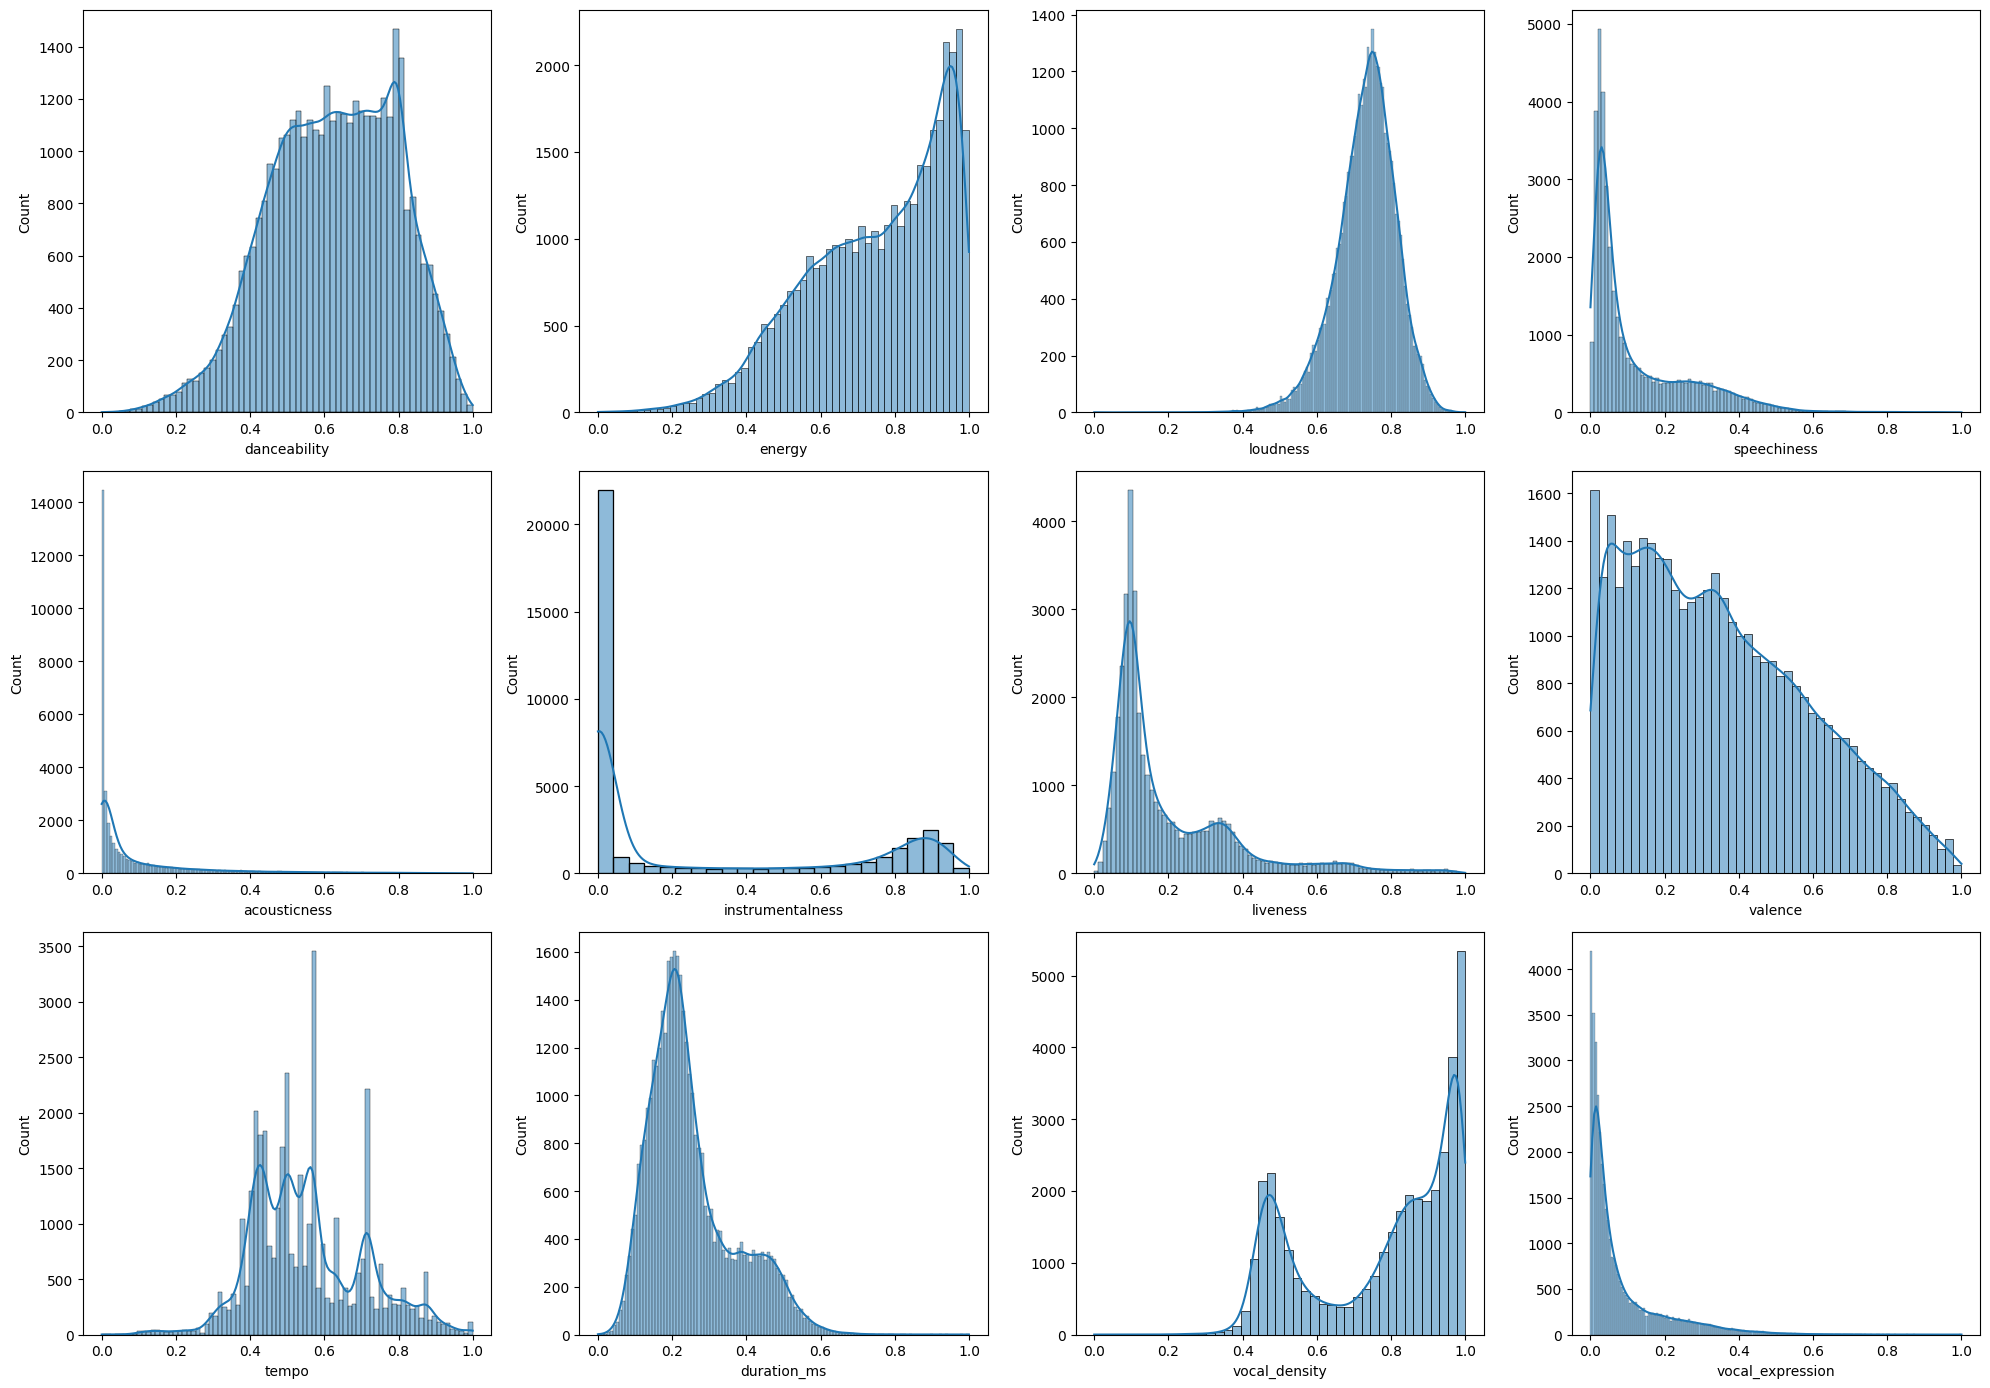

In [ ]:
# Histograms
fig = plt.figure(figsize=(20,14))
for i, col in enumerate(num_cols):
  ax = fig.add_subplot(3, 4, i+1)
  sns.histplot(spotify2_transformed, x=col, kde=True, ax=ax)
fig.tight_layout();
plt.show()

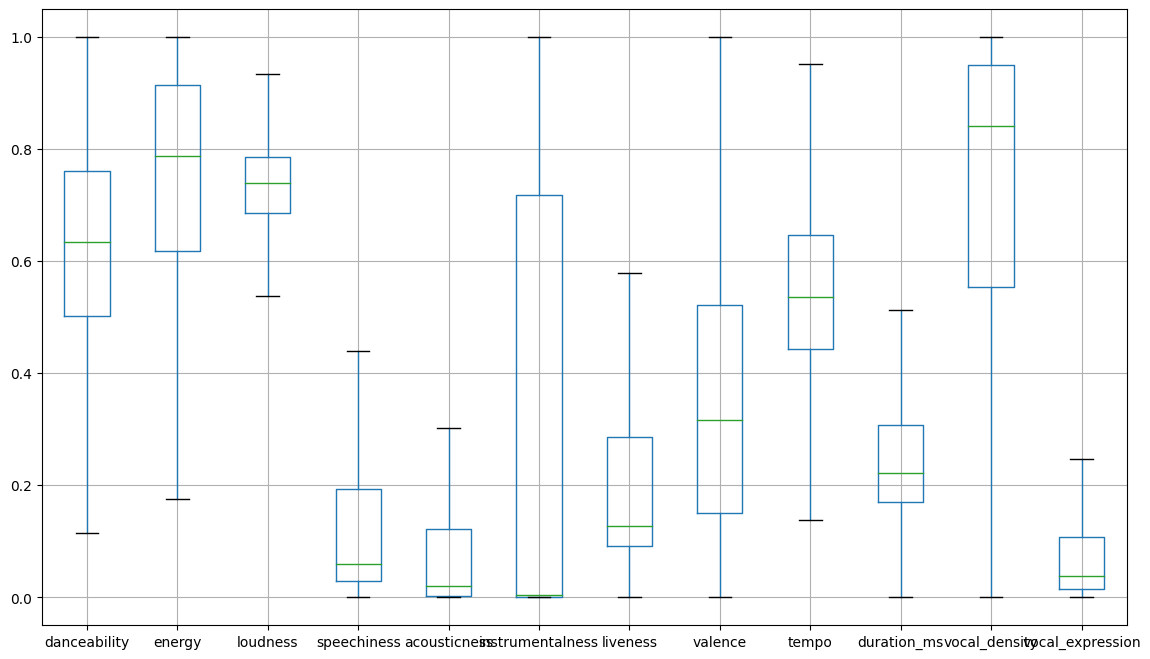

In [ ]:
spotify2_transformed.loc[:,num_cols].boxplot(figsize=(14,8),showfliers=False);

With the transformation the data is in a similar range, but the distribution was not affected, and while some features aproximate gaussianity, most do not and none reach it.

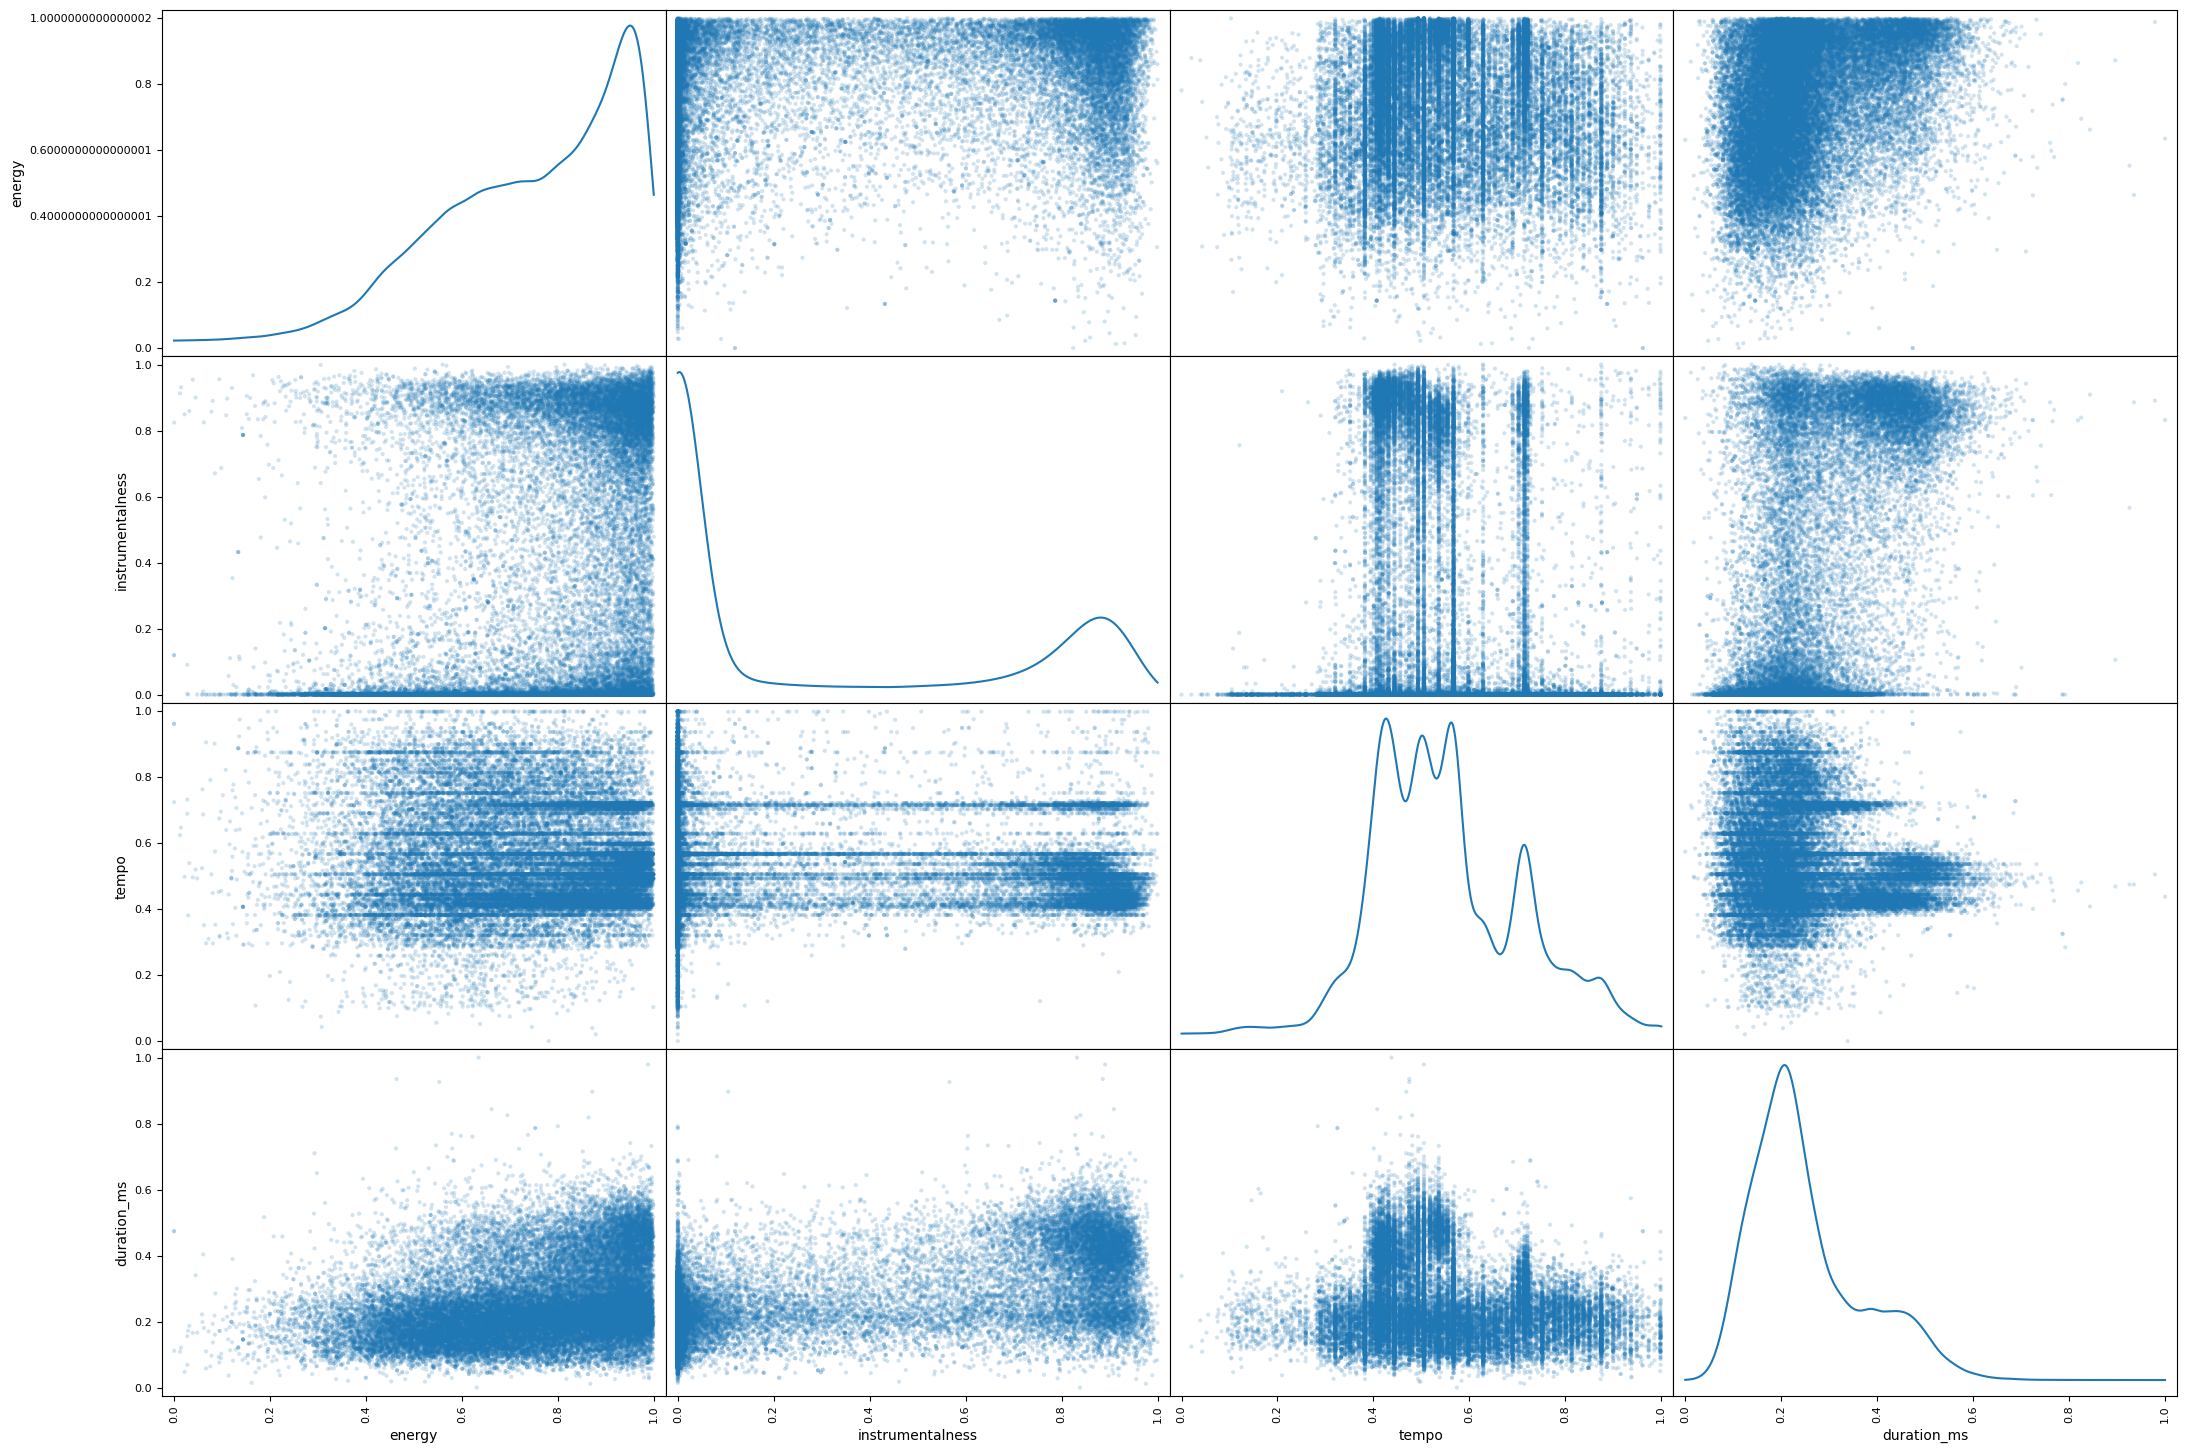

In [ ]:
scatter_matrix(spotify2_transformed.loc[:,['energy','instrumentalness','tempo', 'duration_ms']],
               alpha=0.2, figsize=(26, 18),
               diagonal='kde', marker='.');

It looks like high energy is more focused for low and high intrumentalness, tempo does not seem to affect it and it seems longer songs have higher energy. Instrumentalness seems to be affected by energy and duration, with seemingly longer songs having more instrumentalness. Finally tempo seems to not have any discernible effect on the other variables and duration is affected by intrumentalness and energy, as mentioned before.

In [ ]:
spotify2_transformed = spotify2_transformed.reset_index(drop=True)

In [ ]:
spotify2_transformed['genre'] = spotify2['genre']
spotify2_transformed['key'] = spotify2['key']

## ENDING THE PREPROCESSING

  
 Shuffle the data (to avoid possible ordering biases)

In [ ]:
np.random.seed(144)
spotify2_transformed = spotify2_transformed.sample(frac=1).reset_index(drop=True)

In [ ]:
spotify2 = spotify2.sample(frac=1).reset_index(drop=True)

In [ ]:
spotify2.head()

danceability  energy  key  loudness  speechiness  acousticness  \
0         0.774   0.503    5    -8.994        0.044         0.264   
1         0.583   0.669    0    -7.136        0.144         0.052   
2         0.628   0.873   11    -3.476        0.323         0.182   
3         0.448   0.784    9    -3.686        0.063         0.106   
4         0.421   0.582    2    -8.257        0.053         0.198   

   instrumentalness  liveness  valence    tempo  duration_ms       genre  \
0         7.570e-02     0.075    0.271  140.003       146187   Dark Trap   
1         6.880e-06     0.089    0.750  159.966       157500         Emo   
2         1.130e-03     0.558    0.163  160.023       183405   Dark Trap   
3         1.080e-04     0.668    0.236  136.245       186813         Pop   
4         3.770e-01     0.149    0.076  135.763       109394  Trap Metal   

   vocal_density  vocal_expression  
0          0.880             0.012  
1          0.856             0.108  
2          0.676             0.053  
3          0.937             0.015  
4          0.570             0.004

In [ ]:
spotify2.to_csv('/content/drive/MyDrive/Machine Learning Deliverable/data/spotify2_21_5.csv', index=False)

In [ ]:
spotify2_transformed.to_csv('/content/drive/MyDrive/Machine Learning Deliverable/data/spotify2_transformed.csv', index=False)